In [1]:
path=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/'
#import sys
#sys.path.append(path) 
path_=  'C:/Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models'
import sys
sys.path.append(path_) 

# Regresor

In [174]:
from sklearn.linear_model import ElasticNet
from base_regressor import BaseRegressor
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer

class ElasticNetRegressor(BaseRegressor):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="ElasticNet"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = ElasticNet
        if params is None:
            self.params = {
                'alpha': 0.2,
                'l1_ratio': 0.5,  # Proporción de L1 en la regularización
                'max_iter': 10000,
                # 'tol': 0.001
            }
        if params_space is None:
            self.params_space = {
                'alpha': Real(0.0001, 0.01, prior='log-uniform'),
                'l1_ratio': Real( 0.9, 1.0),  # Rango de 0 a 1 para la proporción de L1
                'max_iter': Integer(1000, 10000),
                #'tol': Real(1e-5, 1e-2, prior='log-uniform')
            }


# Clasificador

In [165]:
from base_classifier import BaseClassifier
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
                'objective'   : ['binary:logistic'],
                'eval_metric' : ['logloss', 'error', 'auc', 'aucpr'],
                'learning_rate': (0.01, 0.1, 0.2),
                'max_depth': (3, 4, 5),
                'subsample': (0.8, 0.9, 1.0),
                'colsample_bytree': (0.8, 0.9, 1.0),
                'reg_alpha': (0, 0.1, 1.0),
                'reg_lambda': (0, 0.1, 1.0),
                #'gamma': (0.001, 0.01, 0.1, 1, 10),
            }

In [275]:
from base_classifier import BaseClassifier
from Plotter import Plotter
from skopt.space import Real, Categorical, Integer
import xgboost as xgb

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import StratifiedKFold


class XGBoostClassifier(BaseClassifier):
    def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None, model_params_search=None, fit_params_train=None, model_params_train=None, name_model="Lasso"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search, model_params_search, fit_params_train, model_params_train, name_model)

        self.model_ml = xgb.XGBClassifier
        if params is None:
            self.params = {
            'objective': 'binary:logistic',  # Clasificación binaria
            'eval_metric': 'logloss',       # Métrica de evaluación
            'learning_rate': 0.1,           # Tasa de aprendizaje
            'max_depth': 6,                 # Profundidad máxima del árbol
            'subsample': 0.8,               # Proporción de muestras utilizadas por árbol
            'colsample_bytree': 0.8,        # Proporción de características utilizadas por árbol
            'reg_alpha': 0.1,               # Regularización L1
            'reg_lambda': 1.0,              # Regularización L2
            'gamma': 0.0,                   # Mínima reducción de pérdida para crear una división
            'min_child_weight': 1,          # Mínimo peso de la suma de los hijos para una división
            'n_estimators': 100,            # Número de árboles en el modelo
            'scale_pos_weight': 1.0         # Para datos desbalanceados
        }
        if params_space is None:
            self.params_space = {
            'objective': ['binary:logistic'],
            'eval_metric': ['logloss', 'error', 'auc', 'aucpr'],
            'learning_rate': Real(0.01, 0.3),
            'max_depth': Integer(3, 10),
            'subsample': Real(0.5, 1.0),
            'colsample_bytree': Real(0.5, 1.0),
            'reg_alpha': Real(0, 1.0),
            'reg_lambda': Real(0, 1.0),
            #'gamma': Real(0.0, 10.0),
            #'min_child_weight': Integer(1, 10),
            #'scale_pos_weight': Real(1.0, 10.0),
            'n_estimators': Integer(100, 1000),  # Número de árboles a probar
        }

# Plot

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Crear una función para graficar el boxplot
def graficar_boxplot_horizontal(dataframes, labels, variable, group_by, colores, title="Boxplot por Región"):
   
    # Crear una lista para almacenar los datos combinados
    datos_combinados = []
    for df, label in zip(dataframes, labels):
        temp_df = df[[group_by, variable]].copy()
        temp_df['Dataset'] = label
        datos_combinados.append(temp_df)
    
    # Concatenar todos los dataframes
    datos_combinados = pd.concat(datos_combinados, ignore_index=True)

    # Crear el gráfico de boxplot
    plt.figure(figsize=(8, 8))
    sns.boxplot(
        data=datos_combinados, 
        y=group_by, 
        x=variable, 
        hue='Dataset',
        palette=colores
    )
    plt.title(title, fontsize=16)
    plt.xlabel(variable, fontsize=14)
    plt.ylabel(group_by, fontsize=14)
    plt.legend(title='Dataset', fontsize=12, loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Instancia de modelos 

In [175]:
from Plotter import Plotter
from sklearn.preprocessing import MinMaxScaler,StandardScaler

model_reg = ElasticNetRegressor()

Plotters = Plotter()

# Parametros de Plot
colorset = 'darkorange'
nameset = 'ElasticNet'

#parametros de scaler
#1:sin scaler 2:Zscore 3:MinMax
Scaler_reg_train=2

#scaler = MinMaxScaler()
Scaler_reg = StandardScaler()

model_cls = XGBoostClassifier()


In [11]:
#72 features
features = ['Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_EPP_OCC_right', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_RPD_CING_left', 'Alpha2_canon_RPD_CING_right', 'Alpha2_canon_RPD_PARIET_left', 'Alpha2_canon_RPD_PARIET_right', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_HPC_right', 'High_subj_spec_EPP_CING_left', 'High_subj_spec_EPP_CING_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_EPP_PARIET_right', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_OCC_right', 'Low_subj_spec_EPP_HPC_left', 'Low_subj_spec_EPP_HPC_right', 'Low_subj_spec_EPP_CING_left', 'Low_subj_spec_EPP_CING_right', 'Low_subj_spec_EPP_PARIET_left', 'Low_subj_spec_EPP_PARIET_right', 'Low_subj_spec_EPP_OCC_left', 'Low_subj_spec_EPP_OCC_right', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_HPC_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_CING_right', 'Low_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_right', 'Low_subj_spec_RPD_OCC_left', 'Low_subj_spec_RPD_OCC_right', 'TF_ORB_left', 'TF_ORB_right', 'TF_IFG_left', 'TF_IFG_right', 'TF_MFG_left', 'TF_MFG_right', 'TF_SFG_left', 'TF_SFG_right', 'TF_HPC_left', 'TF_HPC_right', 'TF_INS_left', 'TF_INS_right', 'IAF_ORB_left', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'IAF_MFG_left', 'IAF_MFG_right', 'IAF_SFG_left', 'IAF_SFG_right', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_INS_left', 'IAF_INS_right', 'IAF_OCC_left', 'IAF_OCC_right']

In [79]:
# Caracteristicas ordenadas

features =[ 'Low_subj_spec_EPP_HPC_left', 'IAF_MFG_right', 'TF_INS_right', 'IAF_MFG_left', 'IAF_SFG_left', 'TF_ORB_right', 'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'Low_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'Low_subj_spec_RPD_PARIET_right']

In [8]:
features = [ 'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'Low_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'Low_subj_spec_RPD_PARIET_right']

In [136]:
features = [ 'IAF_ORB_left', 'TF_ORB_left', 'IAF_SFG_right', 'Low_subj_spec_EPP_HPC_left', 'IAF_MFG_right', 'TF_INS_right', 'IAF_MFG_left', 'IAF_SFG_left', 'TF_ORB_right', 'Low_subj_spec_EPP_OCC_right', 'IAF_ORB_right', 'IAF_IFG_left', 'IAF_IFG_right', 'TF_IFG_right', 'TF_HPC_right', 'IAF_INS_right', 'TF_HPC_left', 'IAF_INS_left', 'IAF_HPC_left', 'IAF_HPC_right', 'IAF_OCC_left', 'Alpha2_canon_RPD_OCC_right', 'Alpha2_canon_EPP_OCC_right', 'IAF_OCC_right', 'Alpha2_canon_EPP_OCC_left', 'Alpha2_canon_RPD_OCC_left', 'Alpha2_canon_EPP_HPC_left', 'Alpha2_canon_RPD_HPC_left', 'Alpha2_canon_RPD_HPC_right', 'Alpha2_canon_EPP_HPC_right', 'Alpha2_canon_RPD_CING_right', 'High_subj_spec_RPD_OCC_right', 'High_subj_spec_EPP_OCC_right', 'High_subj_spec_RPD_HPC_left', 'High_subj_spec_EPP_HPC_left', 'High_subj_spec_EPP_OCC_left', 'High_subj_spec_RPD_OCC_left', 'High_subj_spec_RPD_CING_right', 'High_subj_spec_EPP_CING_right', 'Low_subj_spec_RPD_OCC_right', 'Low_subj_spec_RPD_OCC_left', 'Alpha2_canon_RPD_CING_left', 'Low_subj_spec_RPD_HPC_left', 'Low_subj_spec_RPD_CING_right', 'High_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_HPC_right', 'Alpha2_canon_EPP_PARIET_left', 'Alpha2_canon_RPD_PARIET_left', 'High_subj_spec_RPD_CING_left', 'High_subj_spec_EPP_CING_left', 'Alpha2_canon_EPP_PARIET_right', 'Alpha2_canon_RPD_PARIET_right', 'Low_subj_spec_RPD_CING_left', 'Low_subj_spec_RPD_HPC_right', 'High_subj_spec_EPP_PARIET_left', 'High_subj_spec_RPD_PARIET_left', 'Low_subj_spec_RPD_PARIET_left', 'High_subj_spec_RPD_PARIET_right', 'High_subj_spec_EPP_PARIET_right', 'Low_subj_spec_RPD_PARIET_right']

In [137]:
len(features)

60

# Data

In [225]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle


file_path_CN = f'{path}Brain_Age_Clock/data_freq/CN_freq.xlsx'
file_path_AD = f'{path}Brain_Age_Clock/data_freq/AD_freq.xlsx'
file_path_FTD = f'{path}Brain_Age_Clock/data_freq/FTD_freq.xlsx'
file_path_MCI = f'{path}Brain_Age_Clock/data_freq/MCI_freq.xlsx'

df_CN = pd.read_excel(file_path_CN)
df_AD = pd.read_excel(file_path_AD)
df_FTD = pd.read_excel(file_path_FTD)
df_MCI = pd.read_excel(file_path_MCI)

regiones = ["America", "Turquia", "Europa"]
countrys =  ["Chile", "Argentina", "Colombia", "Brasil", "Turquia", "Reino Unido", "Grecia", "Irlanda"]

df_CN_filtrado = df_CN[(df_CN['Age'] >=50) & (df_CN['Age'] <= 90)].reset_index(drop=True)
df_CN_filtrado = df_CN_filtrado[df_CN_filtrado["Region"].isin(regiones)] # Se saca Turquia

#df_CN_filtrado = df_CN_filtrado[df_CN_filtrado["Country_unique"].isin(countrys)] # Se saca Turquia

df_AD_filtrado = df_AD[(df_AD['Age'] >= 50) & (df_AD['Age'] <= 90)].reset_index(drop=True)
df_FTD_filtrado = df_FTD[(df_FTD['Age'] >= 50) & (df_FTD['Age'] <= 90)].reset_index(drop=True)
df_MCI_filtrado = df_MCI[(df_MCI['Age'] >= 50) & (df_MCI['Age'] <= 90)].reset_index(drop=True)


In [226]:
X_CN = df_CN_filtrado[features]
y_CN = df_CN_filtrado["Age"]
ID_CN = df_CN_filtrado["ID_unique"]

X_AD = df_AD_filtrado[features]
y_AD = df_AD_filtrado["Age"]
ID_AD = df_AD_filtrado["ID_unique"]

X_FTD = df_FTD_filtrado[features]
y_FTD = df_FTD_filtrado["Age"]
ID_FTD = df_FTD_filtrado["ID_unique"]

X_MCI = df_MCI_filtrado[features]
y_MCI = df_MCI_filtrado["Age"]
ID_MCI = df_MCI_filtrado["ID_unique"]

In [251]:
scaler = StandardScaler()
scaler.fit(X_CN)

X_CN_scaled = scaler.transform(X_CN)
X_CN_scaled = pd.DataFrame(X_CN_scaled, columns=X_CN.columns)

df_concatenado_CN = pd.concat([X_CN, y_CN, ID_CN], axis=1, ignore_index=False)
df_concatenado_AD = pd.concat([X_AD, y_AD, ID_AD], axis=1, ignore_index=False)
df_concatenado_FTD = pd.concat([X_FTD, y_FTD, ID_FTD], axis=1, ignore_index=False)
df_concatenado_MCI = pd.concat([X_MCI, y_MCI, ID_MCI], axis=1, ignore_index=False)


In [228]:
X_CN_scaled

IAF_ORB_left  TF_ORB_left  IAF_SFG_right  Low_subj_spec_EPP_HPC_left  \
0       -0.096676    -0.218411      -0.652780                    0.518401   
1       -0.096676     0.212638      -0.791053                    0.475393   
2       -0.441141    -0.649461       0.176853                    0.206668   
3       -0.785605     0.859213      -0.652780                   -0.082755   
4       -0.716712     0.212638      -0.929325                    0.093557   
..            ...          ...            ...                         ...   
667      0.316682     0.428163      -0.929325                    0.894641   
668     -0.647819     0.859213      -0.307100                   -1.136344   
669     -0.578927    -0.218411       0.245989                    1.786485   
670     -0.785605     0.859213       0.176853                    2.159813   
671     -0.234462     0.643688       0.384261                   -0.511209   

     IAF_MFG_right  TF_INS_right  IAF_MFG_left  IAF_SFG_left  TF_ORB_right  \
0        -0.742608     -1.293894     -0.768075     -0.711724      0.812948   
1        -0.162742     -1.293894     -0.768075     -0.711724     -0.456535   
2        -0.626634     -0.123249     -0.528897     -0.848297      0.812948   
3         0.881016     -0.708572     -0.768075     -0.711724      0.812948   
4        -0.742608     -0.123249     -0.768075     -0.438578      0.178206   
..             ...           ...           ...           ...           ...   
667       0.649070      1.047397     -0.768075     -0.848297      0.812948   
668       1.112962     -1.293894     -0.768075     -0.916583     -0.879697   
669      -0.278715     -1.293894      0.308226      0.449146     -1.726019   
670      -0.742608     -1.293894     -0.768075      0.244287      0.812948   
671       0.649070     -0.123249     -0.170130     -0.916583      0.812948   

     Low_subj_spec_EPP_OCC_right  ...  Alpha2_canon_EPP_PARIET_right  \
0                       0.014044  ...                       1.240153   
1                       2.071443  ...                       1.515044   
2                      -0.040373  ...                       0.489181   
3                       0.871940  ...                       1.329944   
4                       1.949713  ...                       0.596766   
..                           ...  ...                            ...   
667                     1.218521  ...                       1.151007   
668                    -0.300477  ...                      -0.266241   
669                    -1.017917  ...                       0.651723   
670                     1.895149  ...                       2.502796   
671                    -0.122076  ...                       0.762030   

     Alpha2_canon_RPD_PARIET_right  Low_subj_spec_RPD_CING_left  \
0                         1.240153                     1.105655   
1                         1.515044                    -0.019401   
2                         0.489181                     0.129128   
3                         1.329944                     2.265569   
4                         0.596766                     0.605914   
..                             ...                          ...   
667                       1.151007                     0.345264   
668                      -0.266241                    -0.102691   
669                       0.651723                     0.178805   
670                       2.502796                     0.776726   
671                       0.762030                     0.445723   

     Low_subj_spec_RPD_HPC_right  High_subj_spec_EPP_PARIET_left  \
0                       0.680510                        0.431564   
1                       0.758582                        0.093917   
2                       0.975934                        0.364298   
3                       1.112492                        1.280103   
4                       0.249734                        1.557575   
..                           ...                             ... 

In [229]:
opt_model, best_params = model_reg.search_best_model (X=X_CN_scaled, y=y_CN, n_iter_=50, scoring_metric='r2')


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

c:\python_env\brain_age_env\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.464e+01, tolerance: 4.521e+00
  model = cd_fast.enet_coordinate_descent(


In [277]:
with open(f'results_model/opt_ElasticNet.pickle', 'wb') as file:
        pickle.dump(opt_model, file)

In [ ]:
with open(f'results_model/opt_ElasticNet.pickle', 'rb') as file:
    opt_model= pickle.load(file)

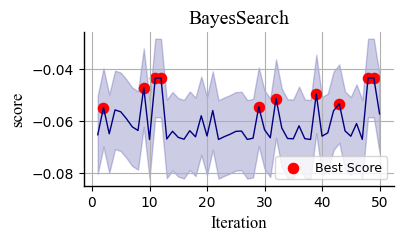

Top 1: Iteration 11, Score -0.04361257016717431
Top 2: Iteration 48, Score -0.04362341163390539
Top 3: Iteration 49, Score -0.04362341163390539
Top 4: Iteration 12, Score -0.04362341163390539
Top 5: Iteration 9, Score -0.047347377355443296
Top 6: Iteration 39, Score -0.04971121350437717
Top 7: Iteration 32, Score -0.05147341686716106
Top 8: Iteration 43, Score -0.053442079138593036
Top 9: Iteration 29, Score -0.05462677530153372
Top 10: Iteration 2, Score -0.05491306547463891


In [276]:
score = opt_model.cv_results_['mean_test_score'][:50]
Plotters.plot_iteration(y=score, title='BayesSearch', xlabel='Iteration', ylabel='score', legend_result=False, best_result=True, y_size=2, font='Times New Roman', weight='normal', mode=2, band_width=0.015)

In [231]:
best_params_ = model_reg.best_hyper(num_best=10, opt_model=opt_model, num_max=50)
best_params_

[{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000},
 {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5396},
 {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 5108},
 {'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 10000},
 {'alpha': 0.008146216961026964,
  'l1_ratio': 0.9700621444621366,
  'max_iter': 8845},
 {'alpha': 0.007034147248056336,
  'l1_ratio': 0.990189705471621,
  'max_iter': 6610},
 {'alpha': 0.006016521664561097,
  'l1_ratio': 0.9174325391559289,
  'max_iter': 8791},
 {'alpha': 0.005236859351368757,
  'l1_ratio': 0.9315895081547063,
  'max_iter': 4859},
 {'alpha': 0.004701190502124882,
  'l1_ratio': 0.9132956149952721,
  'max_iter': 5282},
 {'alpha': 0.004729080547055919,
  'l1_ratio': 0.9883315277380862,
  'max_iter': 3731}]

In [232]:
best_params_[0]

{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 1000}

In [233]:
params_ = {'alpha': 0.01, 'l1_ratio': 1.0, 'max_iter': 1000}


In [234]:
params_ = {'alpha': 0.2,  'max_iter': 1000}


In [235]:
params_ = {'alpha': 0.29558799396387586, 'max_iter': 10000, 'tol': 1e-05}

In [16]:
params_

{'alpha': 0.29558799396387586, 'max_iter': 10000, 'tol': 1e-05}

In [236]:
results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test= model_reg.trainer(
        X=X_CN,
        y=y_CN,
        ID_label='ID_unique',
        ID=ID_CN,
        n_splits=10,
        n_iterations=20,
        params_=best_params_[0]
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:207: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:209: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([resul

In [278]:
import pickle

results_training = [results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test]

with open('results_model/resultados_modelo.pkl', 'wb') as f:
    pickle.dump(results_training, f)

In [ ]:
with open('results_model/resultados_modelo.pkl', 'rb') as f:
    loaded_results = pickle.load(f)

results_labels_df_CN_train, results_labels_df_CN_test,  results_model, results_per_fold_CN_train, results_per_fold_CN_test, df_CN_avg_train,df_CN_avg_test = loaded_results

                            OLS Regression Results                            
Dep. Variable:                 y_pred   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     75.84
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           2.39e-17
Time:                        15:26:14   Log-Likelihood:                -1475.3
No. Observations:                 672   AIC:                             2955.
Df Residuals:                     670   BIC:                             2964.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.2777      0.683     88.296      0.0

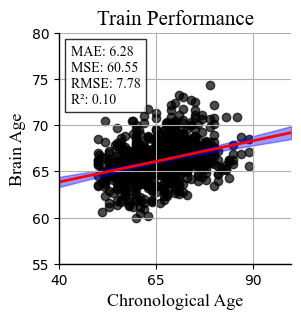

Error medio absoluto: 6.27506888871755
Error cuadrático medio: 60.545318539042206
Raíz del error cuadrático medio: 7.781087233738111
Coeficiente de determinación (R²): 0.10014145104841154


In [237]:
Plotters.plot_regresion(y=df_CN_avg_train['y_pred'],x= df_CN_avg_train['y_labels'], label_='Test Data',x_ticks_step=25,y_ticks_step=5,x_min_limit=40,y_min_limit=55,x_max_limit=100,y_max_limit=80,color='Black', title='Train Performance',line_ideal=False,confidence_interval=True,  alpha=0.7,xlabel='Chronological Age',ylabel='Brain Age',color_confidence_interval='blue',alpha_confidence_interval=0.4,color_line_fit='red', details=True, font='Times New Roman', weight='normal', x_size=3,y_size=3, legend=False, fontsize=13, mode=2)

In [238]:
results_labels_df_AD_test, results_per_fold_AD_test, df_AD_avg_test = model_reg.test(X=X_AD, y=y_AD, ID= ID_AD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_FTD_test, results_per_fold_FTD_test, df_FTD_avg_test = model_reg.test(X=X_FTD, y=y_FTD, ID= ID_FTD, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)
results_labels_df_MCI_test, results_per_fold_MCI_test, df_MCI_avg_test = model_reg.test(X=X_MCI, y=y_MCI, ID= ID_MCI, ID_label='ID_unique', n_splits=10, n_iterations=20,result_model=results_model)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_labels_df_test, temp_pat_df], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_regressor.py:296: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([results_l

In [239]:
np.mean(df_AD_avg_test['GAP_corrected'])

0.7309180699733671

In [240]:
np.mean(df_CN_avg_test['GAP_corrected'])

0.004431538889795707

In [241]:
df_CN_seleccion = df_CN_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'HDI', 'GINI', 'ODQ']]
df_CN_combined = df_CN_avg_test.merge(df_CN_seleccion, on='ID_unique', how='left')



df_AD_seleccion = df_AD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_AD_combined = df_AD_avg_test.merge(df_AD_seleccion, on='ID_unique', how='left')

df_FTD_seleccion = df_FTD_filtrado[['ID_unique', 'Country_unique','Region', 'Age', 'Sex', 'Educ', 'MMSE', 'GINI', 'ODQ']]
df_FTD_combined = df_FTD_avg_test.merge(df_FTD_seleccion, on='ID_unique', how='left')

df_MCI_seleccion = df_MCI_filtrado[['ID_unique', 'Country_unique', 'Region','Age', 'Sex', 'Educ', 'MMSE',  'GINI', 'ODQ']]
df_MCI_combined = df_MCI_avg_test.merge(df_MCI_seleccion, on='ID_unique', how='left')



In [279]:
# Guardar los dataframes combinados en archivos Excel
df_CN_combined.to_excel('results/df_CN_combined.xlsx', index=False)
df_AD_combined.to_excel('results/df_AD_combined.xlsx', index=False)
df_FTD_combined.to_excel('results/df_FTD_combined.xlsx', index=False)
df_MCI_combined.to_excel('results/df_MCI_combined.xlsx', index=False)


C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:508: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Grupo', x='Error', data=df_errors, showfliers=False, palette=colores_personalizados,
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\Plotter.py:526: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontname=font, fontsize=fontsize-2, fontweight=weight)


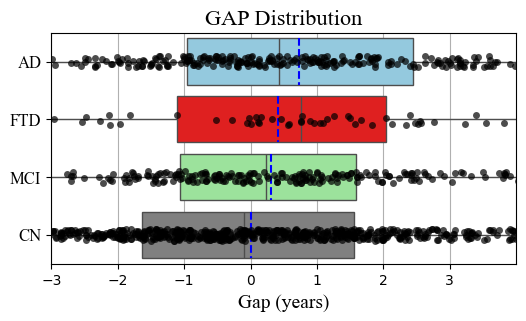

In [242]:
# Crear un DataFrame en formato largo para los errores
corrected_gap_AD = pd.to_numeric(df_AD_avg_test['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test['GAP_corrected'])

data = {
    'Error': np.concatenate([ corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test]),
    'Grupo': ['AD'] * len(corrected_gap_AD) + ['FTD'] * len(corrected_gap_FTD) + ['MCI'] * len(corrected_gap_MCI) + ['CN'] * len(corrected_gap_CN_test)
}

df_errors = pd.DataFrame(data)

# Definir la paleta de colores personalizada
colores_personalizados = {
    'AD': 'skyblue',
    'FTD': 'red',
    'MCI': 'lightgreen',
    'CN': 'gray'
}

Plotters.plot_gap_distribution(df_errors, colores_personalizados,x_size=6, y_size=3,font='Times New Roman', weight='normal', xlabel='Gap (years)', x_limits=(-3, 4),fontsize=14)

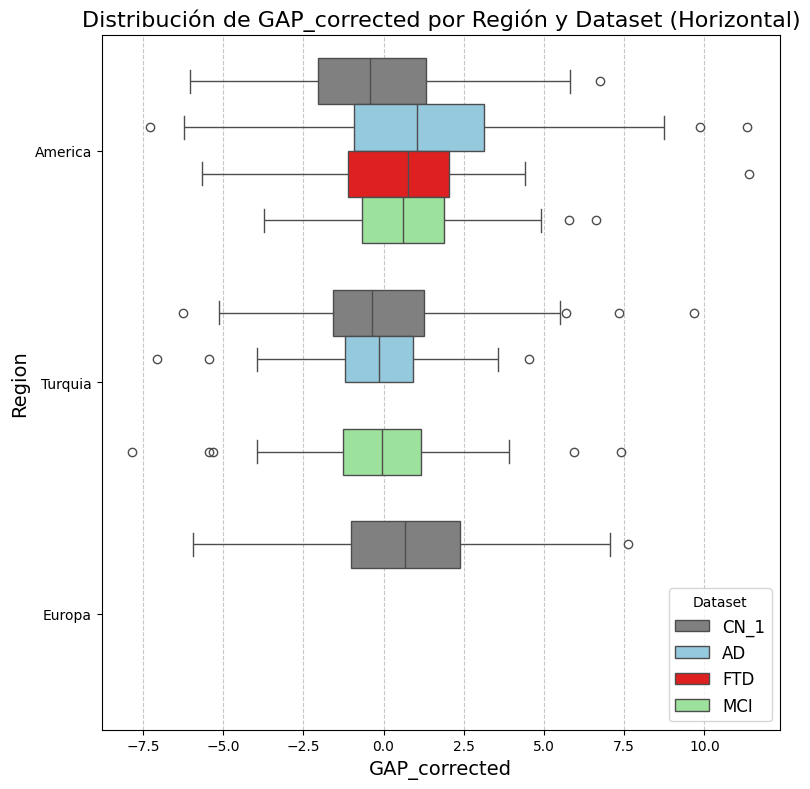

In [243]:
 

# Definir los datasets, etiquetas y colores personalizados
dataframes = [df_CN_combined,  df_AD_combined, df_FTD_combined, df_MCI_combined]
labels = ["CN_1",  "AD", "FTD", "MCI"]
variable = "GAP_corrected"
group_by = "Region"
colores_personalizados = ["gray",  "Skyblue", "red", "lightgreen"]  # Ejemplo de colores

# Llamar a la función
graficar_boxplot_horizontal(
    dataframes, 
    labels, 
    variable, 
    group_by, 
    colores_personalizados, 
    title="Distribución de GAP_corrected por Región y Dataset (Horizontal)"
)


C:\Users\felip\AppData\Local\Temp\ipykernel_65516\2931315497.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\felip\AppData\Local\Temp\ipykernel_65516\2931315497.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\felip\AppData\Local\Temp\ipykernel_65516\2931315497.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\felip\AppData\Local\Temp\ipykernel_65516\2931315497.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

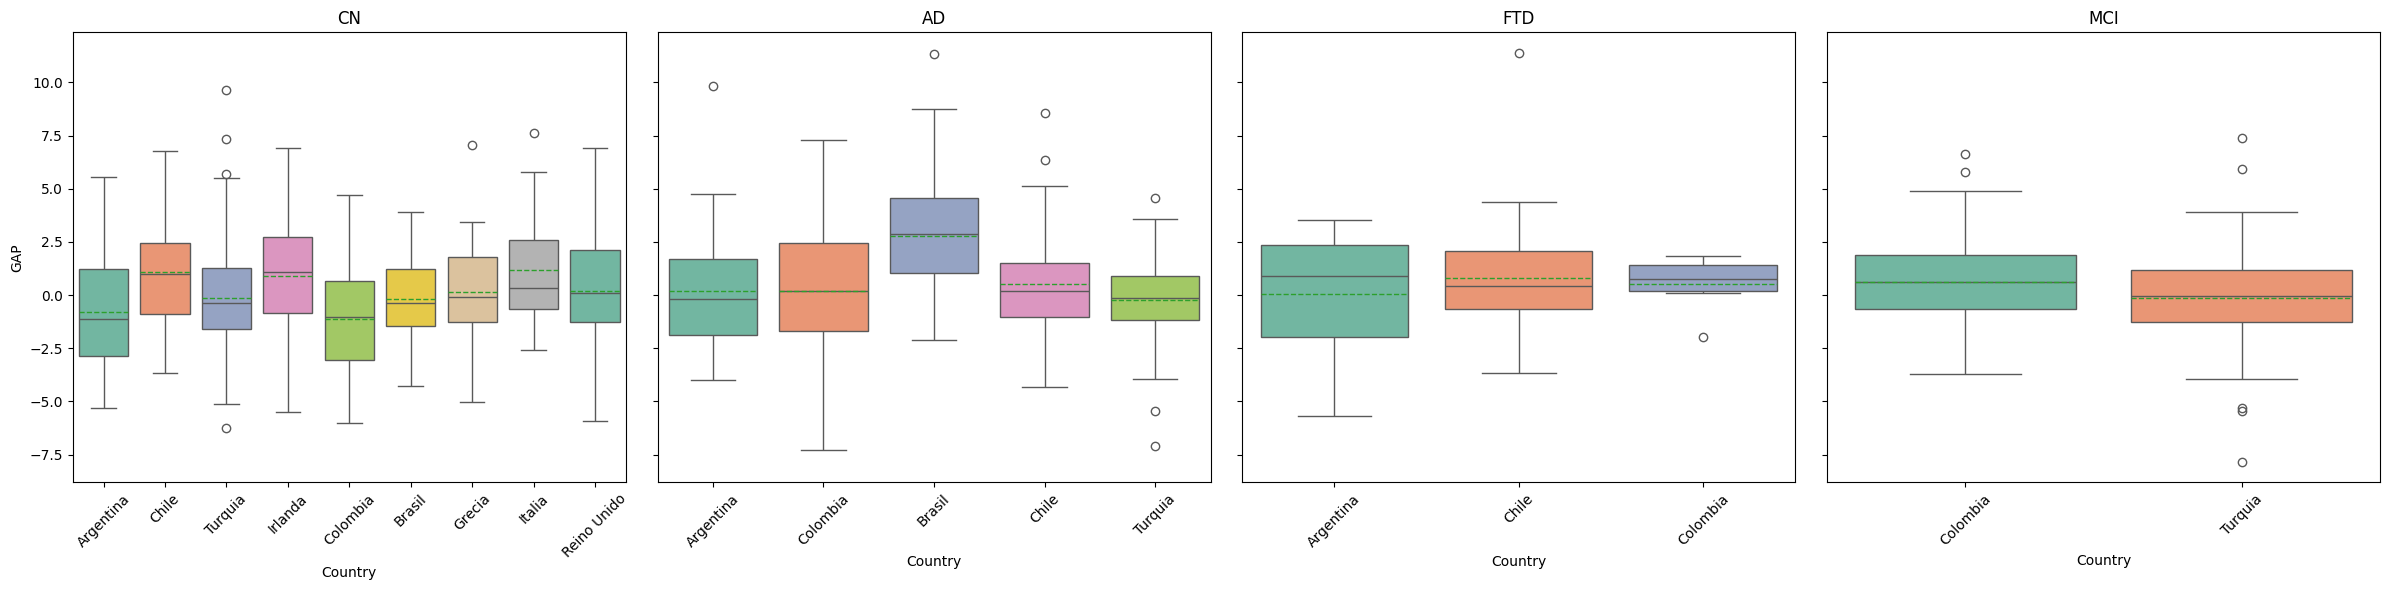

In [244]:
import seaborn as sns
import matplotlib.pyplot as plt

# Función para graficar boxplots de GAP_corrected por Country_unique
def plot_gap_corrected_by_country(dataframes, titles):
    """
    Genera boxplots de la variable GAP_corrected por Country_unique para múltiples dataframes.
    
    :param dataframes: Lista de dataframes a graficar.
    :param titles: Lista de títulos para cada gráfico, en el mismo orden que los dataframes.
    """
    num_plots = len(dataframes)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6), sharey=True)
    
    # Asegurarse de que axes sea un iterable si hay solo un gráfico
    if num_plots == 1:
        axes = [axes]
    
    for i, (df, title) in enumerate(zip(dataframes, titles)):
        sns.boxplot(
            data=df,
            x='Country_unique',
            y='GAP_corrected',
            ax=axes[i],
            palette='Set2',
            showmeans=True,
            meanline=True
        )
        axes[i].set_title(title)
        axes[i].set_xlabel("Country")
        axes[i].set_ylabel("GAP")
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Lista de dataframes y títulos
dataframes = [df_CN_combined, df_AD_combined, df_FTD_combined, df_MCI_combined]
titles = ["CN", "AD", "FTD", "MCI"]

# Llamada a la función
plot_gap_corrected_by_country(dataframes, titles)


In [245]:
import pandas as pd
from scipy.stats import shapiro, levene, f_oneway, kruskal

# Datos de ejemplo
corrected_gap_AD = pd.to_numeric(df_AD_avg_test['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test['GAP_corrected'])

# 1. Prueba de normalidad (Shapiro-Wilk)
print("Pruebas de normalidad:")
shapiro_AD = shapiro(corrected_gap_AD)
shapiro_FTD = shapiro(corrected_gap_FTD)
shapiro_MCI = shapiro(corrected_gap_MCI)
shapiro_CN = shapiro(corrected_gap_CN_test)

print(f"AD: W={shapiro_AD.statistic:.4f}, p={shapiro_AD.pvalue:.4f}")
print(f"FTD: W={shapiro_FTD.statistic:.4f}, p={shapiro_FTD.pvalue:.4f}")
print(f"MCI: W={shapiro_MCI.statistic:.4f}, p={shapiro_MCI.pvalue:.4f}")
print(f"CN: W={shapiro_CN.statistic:.4f}, p={shapiro_CN.pvalue:.4f}")

# 2. Prueba de homogeneidad de varianzas (Levene)
levene_test = levene(corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test)
print("\nPrueba de homogeneidad de varianzas (Levene):")
print(f"Statistic={levene_test.statistic:.4f}, p={levene_test.pvalue:.4f}")

# 3. Pruebas estadísticas de comparación de grupos
if all(p > 0.05 for p in [shapiro_AD.pvalue, shapiro_FTD.pvalue, shapiro_MCI.pvalue, shapiro_CN.pvalue]) and levene_test.pvalue > 0.05:
    # Si los datos son normales y tienen varianzas homogéneas, usar ANOVA
    anova_test = f_oneway(corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test)
    print("\nANOVA:")
    print(f"F={anova_test.statistic:.4f}, p={anova_test.pvalue:.4f}")
else:
    # Si los datos no son normales o las varianzas no son homogéneas, usar Kruskal-Wallis
    kruskal_test = kruskal(corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test)
    print("\nPrueba de Kruskal-Wallis:")
    print(f"Statistic={kruskal_test.statistic:.4f}, p={kruskal_test.pvalue:.4f}")


Pruebas de normalidad:
AD: W=0.9846, p=0.0024
FTD: W=0.9259, p=0.0018
MCI: W=0.9870, p=0.0361
CN: W=0.9940, p=0.0088

Prueba de homogeneidad de varianzas (Levene):
Statistic=3.8757, p=0.0090

Prueba de Kruskal-Wallis:
Statistic=16.8673, p=0.0008


In [246]:
import pandas as pd
from scipy.stats import f_oneway

# Datos: Asegúrate de que cada variable contiene los valores de GAP de cada grupo
corrected_gap_AD = pd.to_numeric(df_AD_avg_test['GAP_corrected'])
corrected_gap_FTD = pd.to_numeric(df_FTD_avg_test['GAP_corrected'])
corrected_gap_MCI = pd.to_numeric(df_MCI_avg_test['GAP_corrected'])
corrected_gap_CN_test = pd.to_numeric(df_CN_avg_test['GAP_corrected'])

# Realizar ANOVA
anova_test = f_oneway(corrected_gap_AD, corrected_gap_FTD, corrected_gap_MCI, corrected_gap_CN_test)

# Mostrar resultados
print("Resultados de ANOVA:")
print(f"F-statistic: {anova_test.statistic:.4f}")
print(f"p-value: {anova_test.pvalue:.4f}")

# Interpretación
if anova_test.pvalue < 0.05:
    print("Hay diferencias significativas entre los grupos (p < 0.05).")
else:
    print("No hay diferencias significativas entre los grupos (p >= 0.05).")


Resultados de ANOVA:
F-statistic: 6.1909
p-value: 0.0004
Hay diferencias significativas entre los grupos (p < 0.05).


# Metrics

In [280]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def calculate_metrics(results_per_fold):
    # Lista para almacenar resultados
    metrics_results = []

    # Iteramos sobre cada fold y su índice
    for fold_idx, fold_data in enumerate(results_per_fold):
        # Extraemos las columnas necesarias
        y_true = fold_data['y_labels']
        y_pred = fold_data['y_pred']
        y_pred_corrected = fold_data['y_pred_corrected']

        # Calculamos las métricas para y_pred
        mae = mean_absolute_error(y_true, y_pred)
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_true, y_pred)

        # Calculamos las métricas para y_pred_corrected
        mae_corrected = mean_absolute_error(y_true, y_pred_corrected)
        mse_corrected = mean_squared_error(y_true, y_pred_corrected)
        rmse_corrected = np.sqrt(mse_corrected)
        r2_corrected = r2_score(y_true, y_pred_corrected)

        # Agregamos los resultados a la lista
        metrics_results.append({
            'fold': fold_idx,
            'MAE': mae,
            'R2': r2,
            'MSE': mse,
            'RMSE': rmse,
            'MAE_corrected': mae_corrected,
            'R2_corrected': r2_corrected,
            'MSE_corrected': mse_corrected,
            'RMSE_corrected': rmse_corrected
        })

    # Convertimos los resultados a un DataFrame
    metrics_df = pd.DataFrame(metrics_results)
    return metrics_df

In [287]:
metrics_df_CN_test = calculate_metrics(results_per_fold_CN_test)
metrics_df_CN_train = calculate_metrics(results_per_fold_CN_train)

metrics_df_AD_test = calculate_metrics(results_per_fold_AD_test)
metrics_df_FTD_test = calculate_metrics(results_per_fold_FTD_test)
metrics_df_MCI_test = calculate_metrics(results_per_fold_MCI_test)

In [288]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

def plot_comparative_boxplots(metrics_dict, group_colors):
    metrics = ['MAE', 'R2', 'MSE', 'RMSE', 'MAE_corrected', 'R2_corrected', 'MSE_corrected', 'RMSE_corrected']
    averages = {}

    # Creamos una figura para cada métrica
    for metric in metrics:
        plt.figure(figsize=(4, 2))
        data_to_plot = []
        labels = []
        colors = []

        for group_name, metrics_df in metrics_dict.items():
            data_to_plot.append(metrics_df[metric])
            labels.append(group_name)
            
            # Asignamos el color correspondiente al grupo
            colors.append(group_colors.get(group_name, "#cccccc"))  # Color por defecto si no se encuentra en el diccionario

            # Calculamos el promedio para este grupo y métrica
            if group_name not in averages:
                averages[group_name] = {}
            averages[group_name][metric] = metrics_df[metric].mean()

        # Generamos el boxplot con colores personalizados
        box = plt.boxplot(data_to_plot, labels=labels, vert=False, patch_artist=True)

        # Aplicamos los colores a las cajas
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)

        # Personalización del gráfico
        plt.title(f'Comparative Boxplot for {metric}')
        plt.xlabel(metric)
        plt.ylabel('Groups')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.show()

    return averages

C:\Users\felip\AppData\Local\Temp\ipykernel_65516\156077863.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=labels, vert=False, patch_artist=True)


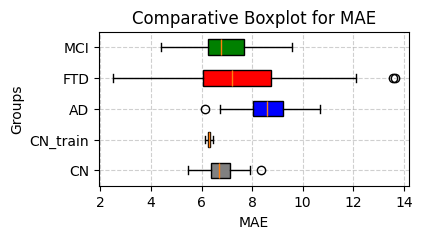

C:\Users\felip\AppData\Local\Temp\ipykernel_65516\156077863.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=labels, vert=False, patch_artist=True)


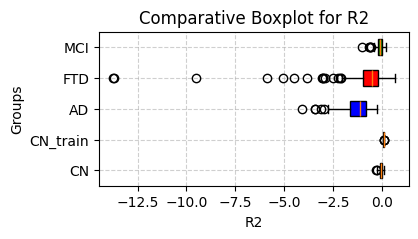

C:\Users\felip\AppData\Local\Temp\ipykernel_65516\156077863.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=labels, vert=False, patch_artist=True)


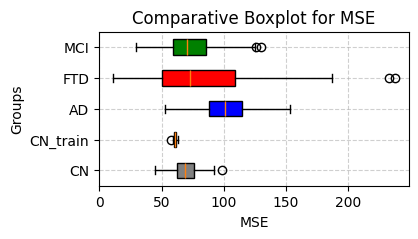

C:\Users\felip\AppData\Local\Temp\ipykernel_65516\156077863.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=labels, vert=False, patch_artist=True)


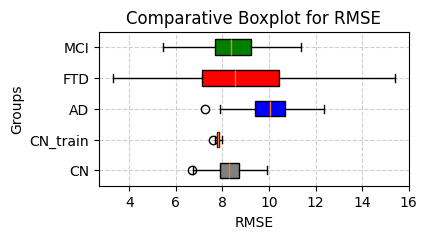

C:\Users\felip\AppData\Local\Temp\ipykernel_65516\156077863.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=labels, vert=False, patch_artist=True)


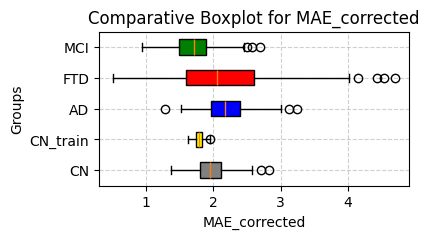

C:\Users\felip\AppData\Local\Temp\ipykernel_65516\156077863.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=labels, vert=False, patch_artist=True)


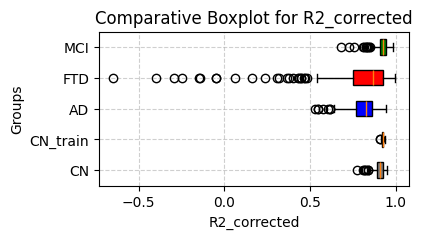

C:\Users\felip\AppData\Local\Temp\ipykernel_65516\156077863.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=labels, vert=False, patch_artist=True)


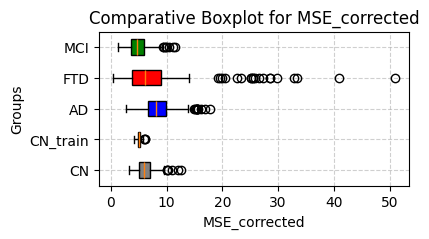

C:\Users\felip\AppData\Local\Temp\ipykernel_65516\156077863.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=labels, vert=False, patch_artist=True)


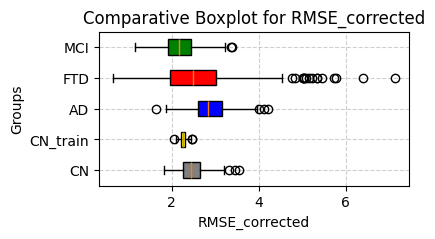

{'CN': {'MAE': 6.733777031773968, 'R2': -0.04487982006265288, 'MSE': 69.27083337813225, 'RMSE': 8.302143743690184, 'MAE_corrected': 1.969597338768442, 'R2_corrected': 0.9044670944842291, 'MSE_corrected': 6.223493537570187, 'RMSE_corrected': 2.4762051081389296}, 'CN_train': {'MAE': 6.294936307034931, 'R2': 0.09461877459737048, 'MSE': 60.90740823478573, 'RMSE': 7.80404348320676, 'MAE_corrected': 1.788212103496836, 'R2_corrected': 0.9245591933286857, 'MSE_corrected': 5.074562924012092, 'RMSE_corrected': 2.2513744306541925}, 'AD': {'MAE': 8.62805049356614, 'R2': -1.2341952953993853, 'MSE': 101.81579804645058, 'RMSE': 10.047361055247725, 'MAE_corrected': 2.2020127790506954, 'R2_corrected': 0.8114711226411591, 'MSE_corrected': 8.537990578974402, 'RMSE_corrected': 2.8855827433868217}, 'FTD': {'MAE': 7.392693062524455, 'R2': -0.8827817470414662, 'MSE': 81.65512089186822, 'RMSE': 8.721535618714508, 'MAE_corrected': 2.146947623694612, 'R2_corrected': 0.7771625726900356, 'MSE_corrected': 8.184985

In [290]:
metrics_dict = {
    'CN': metrics_df_CN_test,
    'CN_train': metrics_df_CN_train,
    'AD': metrics_df_AD_test,
    'FTD': metrics_df_FTD_test,
    'MCI': metrics_df_MCI_test
}

group_colors = {
    'CN': 'Gray',
    'CN_train': 'yellow',
    'AD': 'Blue',
    'FTD': 'red',
    'MCI': 'green'
}

averages = plot_comparative_boxplots(metrics_dict,group_colors)
print(averages)

# SHAP

In [248]:
df_concatenado_CN

IAF_ORB_left  TF_ORB_left  IAF_SFG_right  Low_subj_spec_EPP_HPC_left  \
9        8.833333     7.583333         8.2500                    0.008538   
10       8.833333     7.750000         8.1250                    0.008344   
11       8.416667     7.416667         9.0000                    0.007132   
12       8.000000     8.000000         8.2500                    0.005826   
13       8.083333     7.750000         8.0000                    0.006621   
..            ...          ...            ...                         ...   
676      9.333333     7.833333         8.0000                    0.010236   
677      8.166667     8.000000         8.5625                    0.001072   
678      8.250000     7.583333         9.0625                    0.014260   
679      8.000000     8.000000         9.0000                    0.015945   
680      8.666667     7.916667         9.1875                    0.003893   

     IAF_MFG_right  TF_INS_right  IAF_MFG_left  IAF_SFG_left  TF_ORB_right  \
9            8.000          7.00         8.000        8.1875      8.000000   
10           8.625          7.00         8.000        8.1875      7.500000   
11           8.125          7.50         8.250        8.0625      8.000000   
12           9.750          7.25         8.000        8.1875      8.000000   
13           8.000          7.50         8.000        8.4375      7.750000   
..             ...           ...           ...           ...           ...   
676          9.500          8.00         8.000        8.0625      8.000000   
677         10.000          7.00         8.000        8.0000      7.333333   
678          8.500          7.00         9.125        9.2500      7.000000   
679          8.000          7.00         8.000        9.0625      8.000000   
680          9.500          7.50         8.625        8.0000      8.000000   

     Low_subj_spec_EPP_OCC_right  ...  Low_subj_spec_RPD_CING_left  \
9                       0.006859  ...                     0.001268   
10                      0.016011  ...                     0.000928   
11                      0.006616  ...                     0.000973   
12                      0.010675  ...                     0.001620   
13                      0.015470  ...                     0.001117   
..                           ...  ...                          ...   
676                     0.012217  ...                     0.001038   
677                     0.005459  ...                     0.000902   
678                     0.002268  ...                     0.000988   
679                     0.015227  ...                     0.001169   
680                     0.006253  ...                     0.001069   

     Low_subj_spec_RPD_HPC_right  High_subj_spec_EPP_PARIET_left  \
9                       0.001202                        0.009995   
10                      0.001232                        0.008989   
11                      0.001314                        0.009795   
12                      0.001366                        0.012522   
13                      0.001039                        0.013349   
..                           ...                             ...   
676                     0.001248                        0.009432   
677                     0.000950                        0.007376   
678                     0.001755                        0.009610   
679                     0.001880                        0.012289   
680                     0.001174                        0.008714   

     High_subj_spec_RPD_PARIET_left  Low_subj_spec_RPD_PARIET_left  \
9                          0.001111                       0.001215   
10                         0.000999                       0.001035   
11                         0.001088                       0.001139   
12                         0.001391                       0.001408   
13                         0.001483                       0.001517   
..                              ...                            ..

In [252]:
shap_values_CN, shap_values_avg_CN, shap_summary_sorted_CN, shap_per_fold_CN = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_CN,'ID_unique', results_per_fold_CN_train, results_per_fold_CN_test, results_model['model'],scaler=Scaler_reg_train
)

shap_values_AD, shap_values_avg_AD, shap_summary_sorted_AD, shap_per_fold_AD = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_AD,'ID_unique', results_per_fold_CN_train, results_per_fold_AD_test, results_model['model'],scaler=Scaler_reg_train
)

shap_values_FTD, shap_values_avg_FTD, shap_summary_sorted_FTD, shap_per_fold_FTD = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_FTD,'ID_unique', results_per_fold_CN_train, results_per_fold_FTD_test, results_model['model'],scaler=Scaler_reg_train
)

shap_values_MCI, shap_values_avg_MCI, shap_summary_sorted_MCI, shap_per_fold_MCI = model_reg.calculate_multiple_shap(
    df_concatenado_CN, df_concatenado_MCI,'ID_unique', results_per_fold_CN_train, results_per_fold_MCI_test, results_model['model'],scaler=Scaler_reg_train
)

Importancia de características basada en suma de valores SHAP:
Alpha2_canon_RPD_CING_right: 1938.6322816738636
Low_subj_spec_RPD_OCC_left: 1316.6716193308666
High_subj_spec_EPP_OCC_left: 1138.7342000571834
Alpha2_canon_RPD_CING_left: 1076.0966001618226
Low_subj_spec_RPD_PARIET_left: 1017.2246790678885
High_subj_spec_RPD_OCC_left: 797.6649528262432
Low_subj_spec_EPP_OCC_right: 684.126065793842
Alpha2_canon_EPP_PARIET_left: 680.4469899058216
Low_subj_spec_RPD_HPC_right: 666.7434297095316
Alpha2_canon_EPP_OCC_left: 601.3767466727055
Low_subj_spec_RPD_HPC_left: 596.8821791364068
High_subj_spec_RPD_CING_left: 537.7923169304756
Alpha2_canon_RPD_PARIET_left: 528.1138071042742
IAF_ORB_left: 509.9356312672673
Low_subj_spec_RPD_CING_left: 502.09377370729203
Alpha2_canon_RPD_OCC_left: 429.5806529106109
High_subj_spec_EPP_CING_left: 418.7331118354775
IAF_OCC_right: 354.9298474668902
IAF_INS_left: 300.9204721021842
TF_IFG_right: 284.9552617805075
Alpha2_canon_EPP_PARIET_right: 284.1537538358475
Hig

In [291]:
with open('results_model/shap_summary_sorted_CN.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_CN, f)

with open('results_model/shap_values_CN.pkl', 'wb') as f:
    pickle.dump(shap_values_CN, f)

with open('results_model/shap_summary_sorted_AD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_AD, f)

with open('results_model/shap_values_AD.pkl', 'wb') as f:
    pickle.dump(shap_values_AD, f)

with open('results_model/shap_summary_sorted_FTD.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_FTD, f)

with open('results_model/shap_values_FTD.pkl', 'wb') as f:
    pickle.dump(shap_values_FTD, f)

with open('results_model/shap_summary_sorted_MCI.pkl', 'wb') as f:
    pickle.dump(shap_summary_sorted_MCI, f)

with open('results_model/shap_values_MCI.pkl', 'wb') as f:
    pickle.dump(shap_values_MCI, f)


In [ ]:
import pickle

# Leer los archivos y cargar los datos en las mismas variables
with open('results_model/shap_summary_sorted_CN.pkl', 'rb') as f:
    shap_summary_sorted_CN = pickle.load(f)

with open('results_model/shap_values_CN.pkl', 'rb') as f:
    shap_values_CN = pickle.load(f)

with open('results_model/shap_summary_sorted_AD.pkl', 'rb') as f:
    shap_summary_sorted_AD = pickle.load(f)

with open('results_model/shap_values_AD.pkl', 'rb') as f:
    shap_values_AD = pickle.load(f)

with open('results_model/shap_summary_sorted_FTD.pkl', 'rb') as f:
    shap_summary_sorted_FTD = pickle.load(f)

with open('results_model/shap_values_FTD.pkl', 'rb') as f:
    shap_values_FTD = pickle.load(f)

with open('results_model/shap_summary_sorted_MCI.pkl', 'rb') as f:
    shap_summary_sorted_MCI = pickle.load(f)

with open('results_model/shap_values_MCI.pkl', 'rb') as f:
    shap_values_MCI = pickle.load(f)




In [292]:
import pandas as pd

# Función para guardar un shap summary en un archivo Excel
def save_shap_summary_to_excel(shap_summary, filename):
    # Crear un DataFrame a partir del shap_summary
    df = pd.DataFrame(shap_summary, columns=['Feature', 'SHAP Value'])
    # Guardar el DataFrame en un archivo Excel
    df.to_excel(filename, index=False)

# Guardar cada shap summary en un archivo Excel
save_shap_summary_to_excel(shap_summary_sorted_CN, 'results/shap_summary_sorted_CN.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_AD, 'results/shap_summary_sorted_AD.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_FTD, 'results/shap_summary_sorted_FTD.xlsx')
save_shap_summary_to_excel(shap_summary_sorted_MCI, 'results/shap_summary_sorted_MCI.xlsx')

# SHAP CN

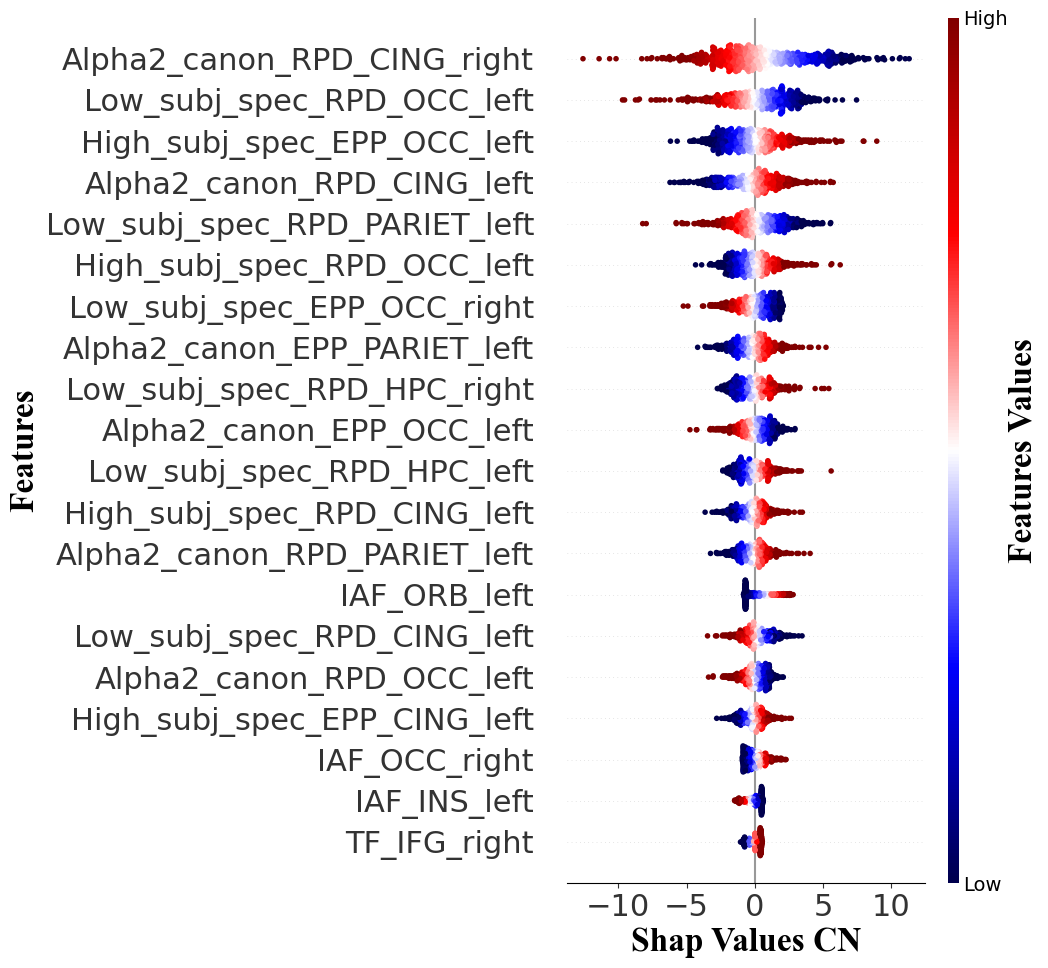

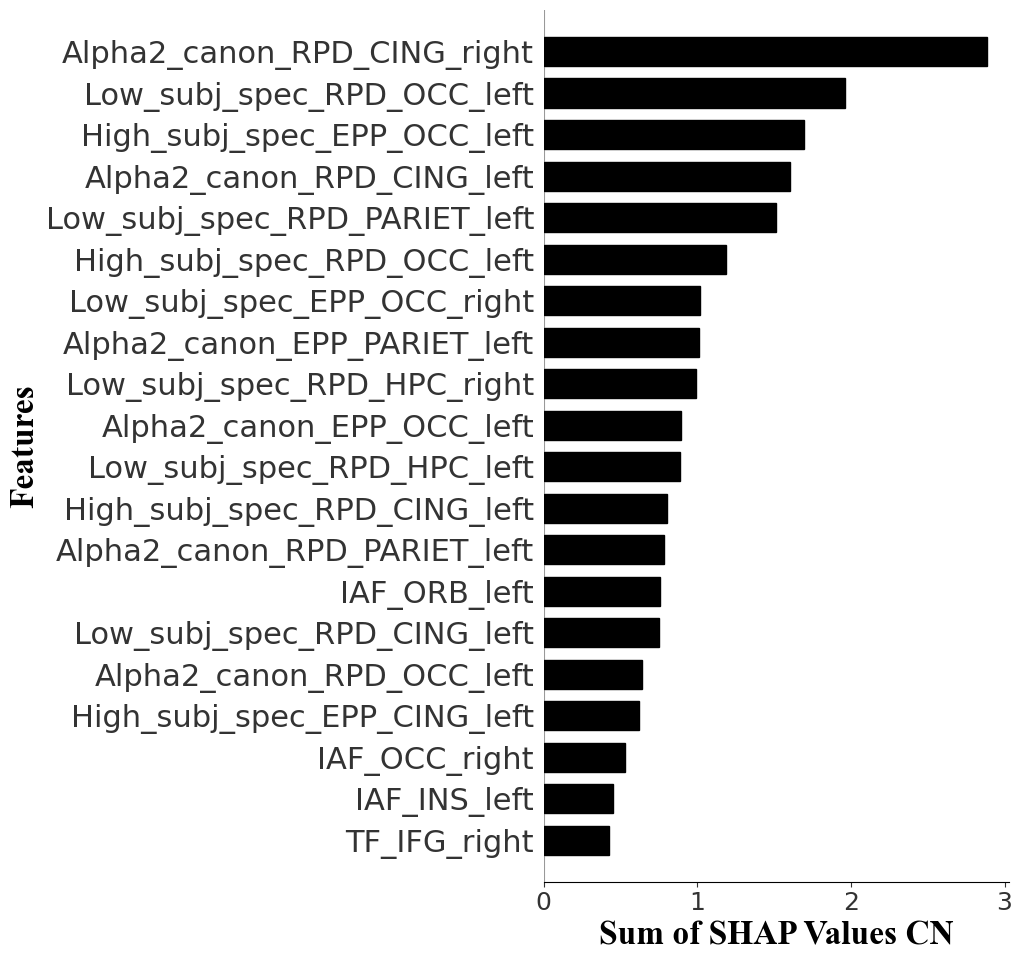

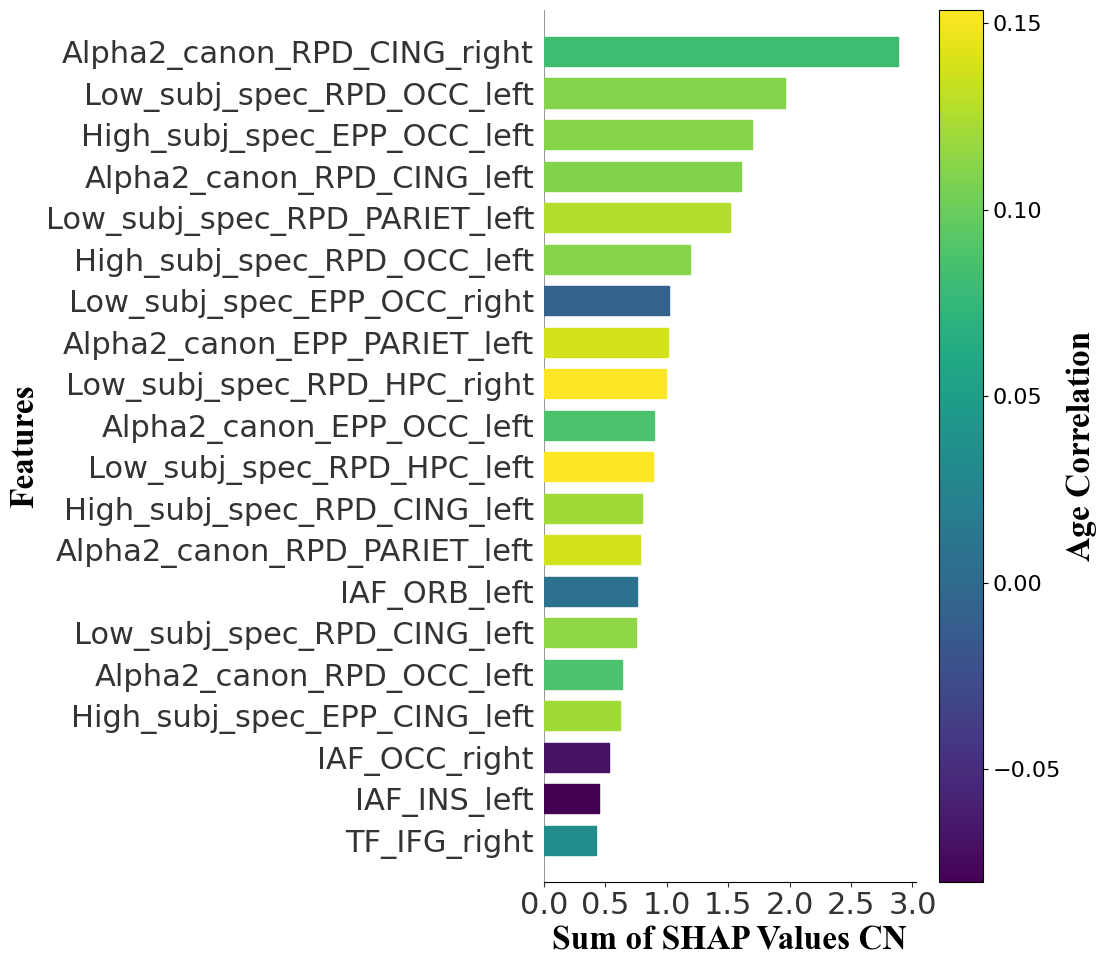

In [255]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_CN,X_test=X_CN,y_test=y_CN, font= "Times New Roman", fontsize=24, xlabel1='Shap Values CN', xlabel2='Sum of SHAP Values CN',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [256]:
shap_per_region_sorted_CN, normalized_result_sorted_CN=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_CN, num_max=20)

OCC_left: 1.000000
CING_left: 0.591666
PARIET_left: 0.519554
CING_right: 0.452526
OCC_right: 0.242542
HPC_right: 0.155635
HPC_left: 0.139327
ORB_left: 0.119032
INS_left: 0.070242
IFG_right: 0.066516


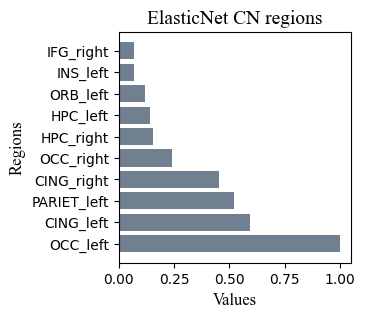

In [258]:
Plotters.plot_normalized_values(normalized_result_sorted_CN, color='slategray', name_set='ElasticNet CN regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


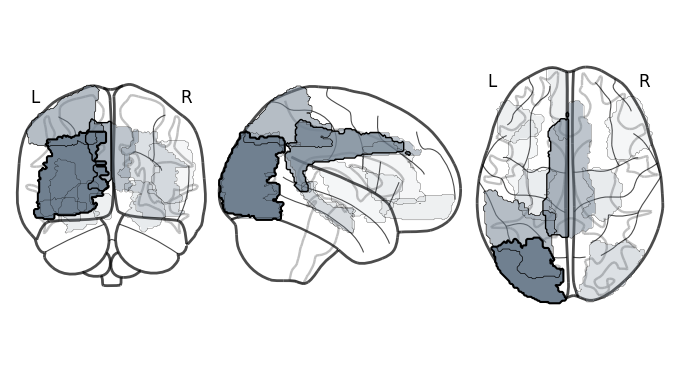

In [259]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_CN, base_path, color='slategray')

# SHAP AD

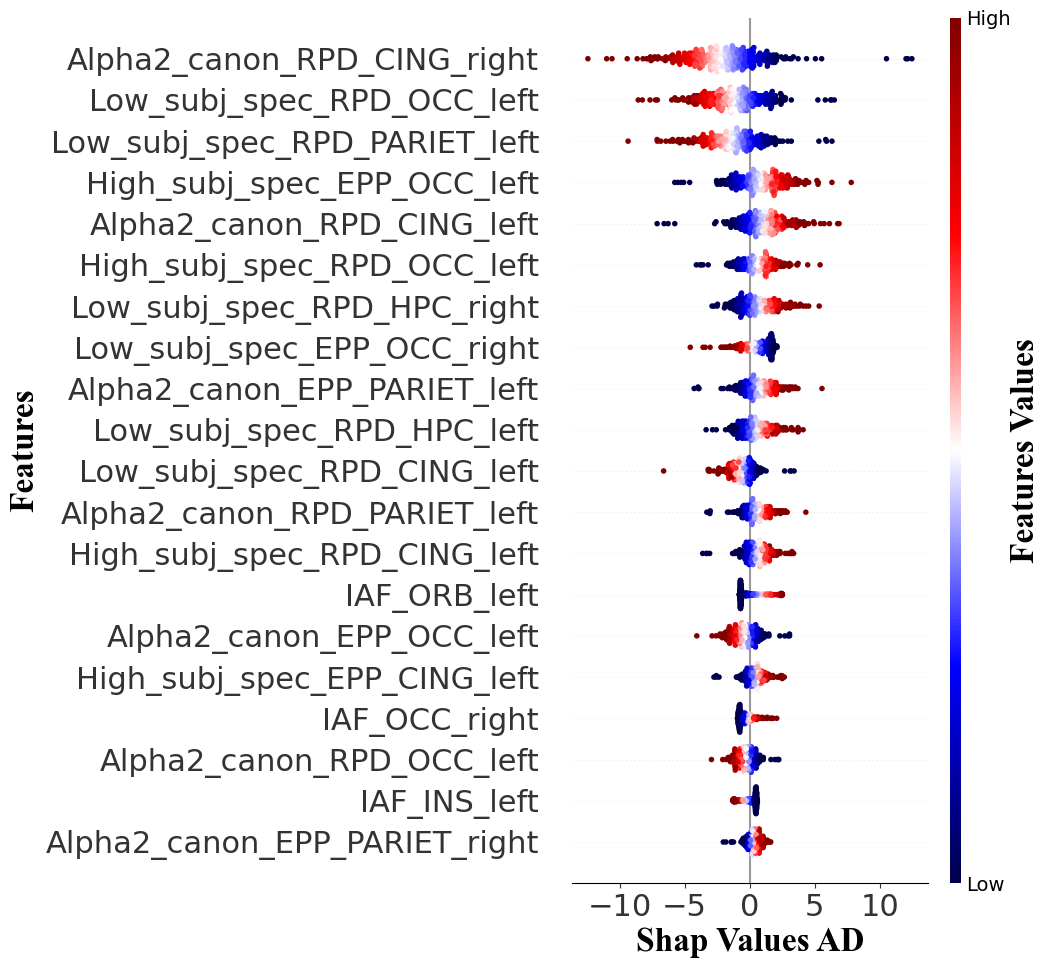

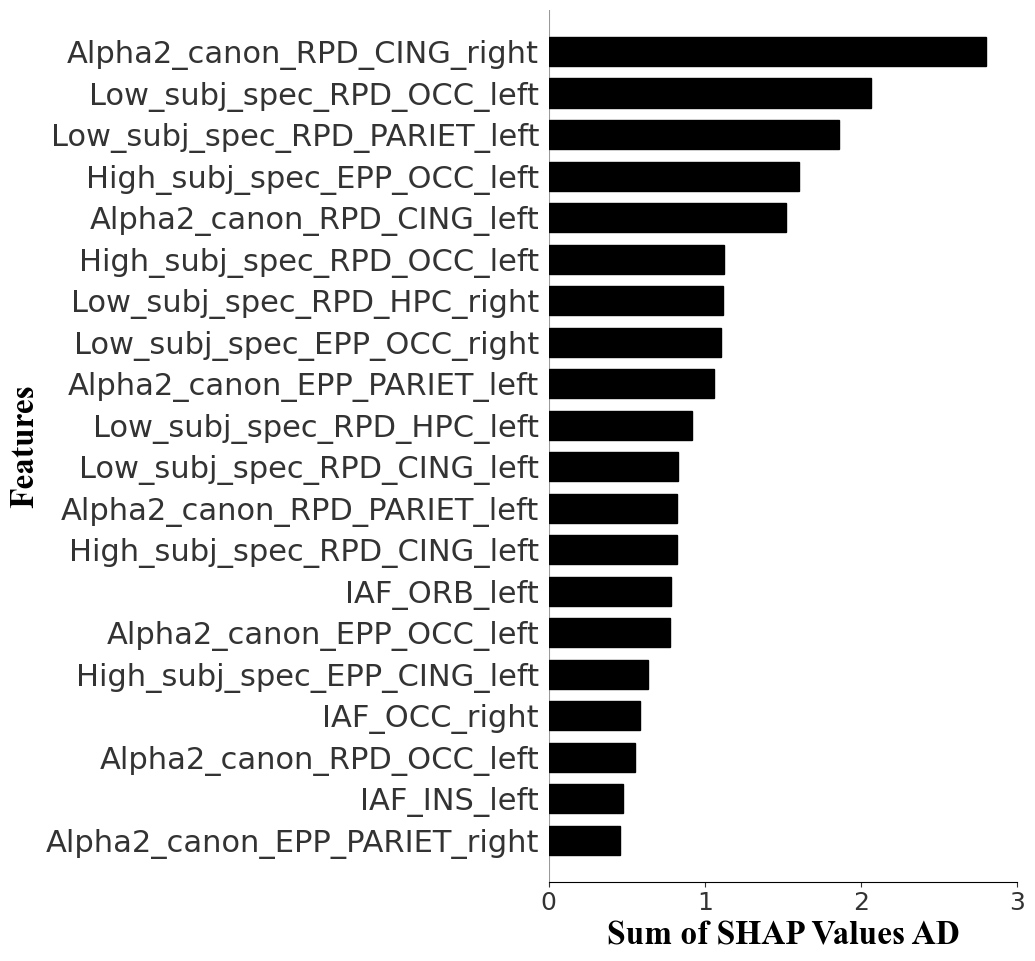

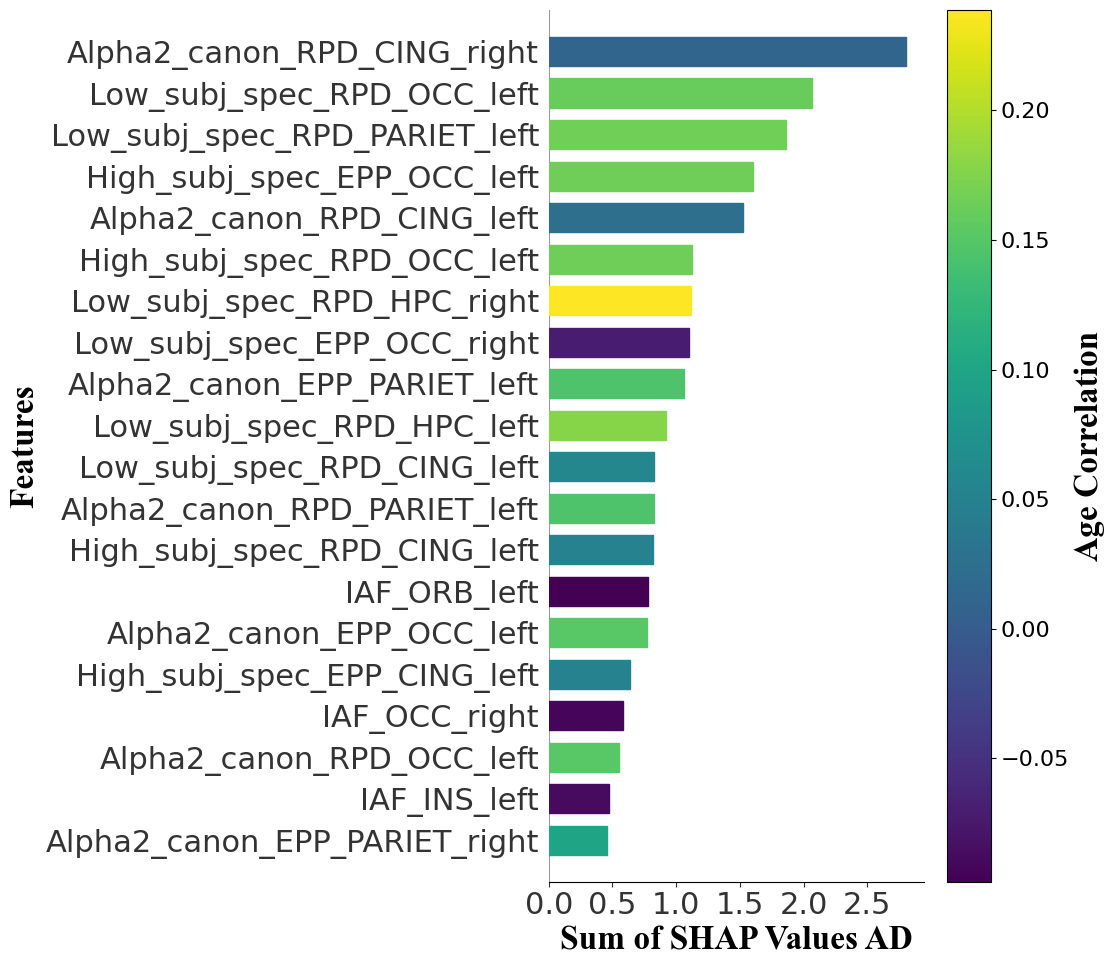

In [261]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_AD,X_test=X_AD,y_test=y_AD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values AD', xlabel2='Sum of SHAP Values AD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [262]:
shap_per_region_sorted_AD, normalized_result_sorted_AD=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_AD, num_max=20)

OCC_left: 1.000000
CING_left: 0.622209
PARIET_left: 0.611875
CING_right: 0.457869
OCC_right: 0.275207
HPC_right: 0.182248
HPC_left: 0.150048
ORB_left: 0.127814
INS_left: 0.077783
PARIET_right: 0.074691


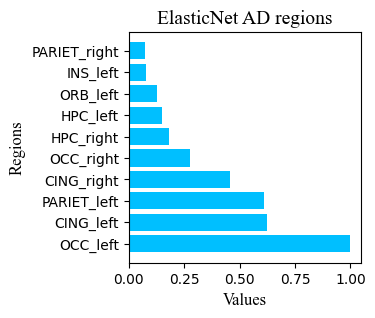

In [263]:
Plotters.plot_normalized_values(normalized_result_sorted_AD, color='deepskyblue', name_set='ElasticNet AD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


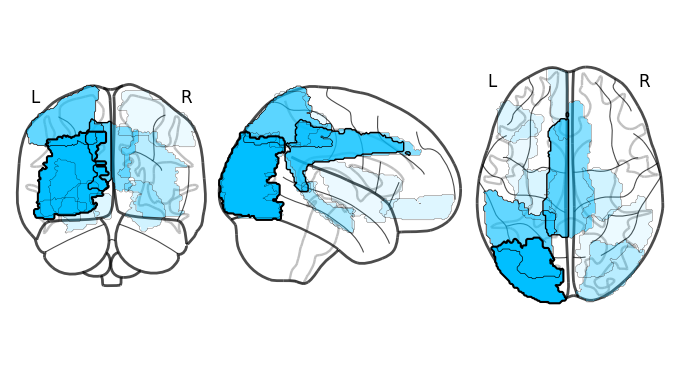

In [264]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_AD, base_path, color='deepskyblue')

# SHAP FTD

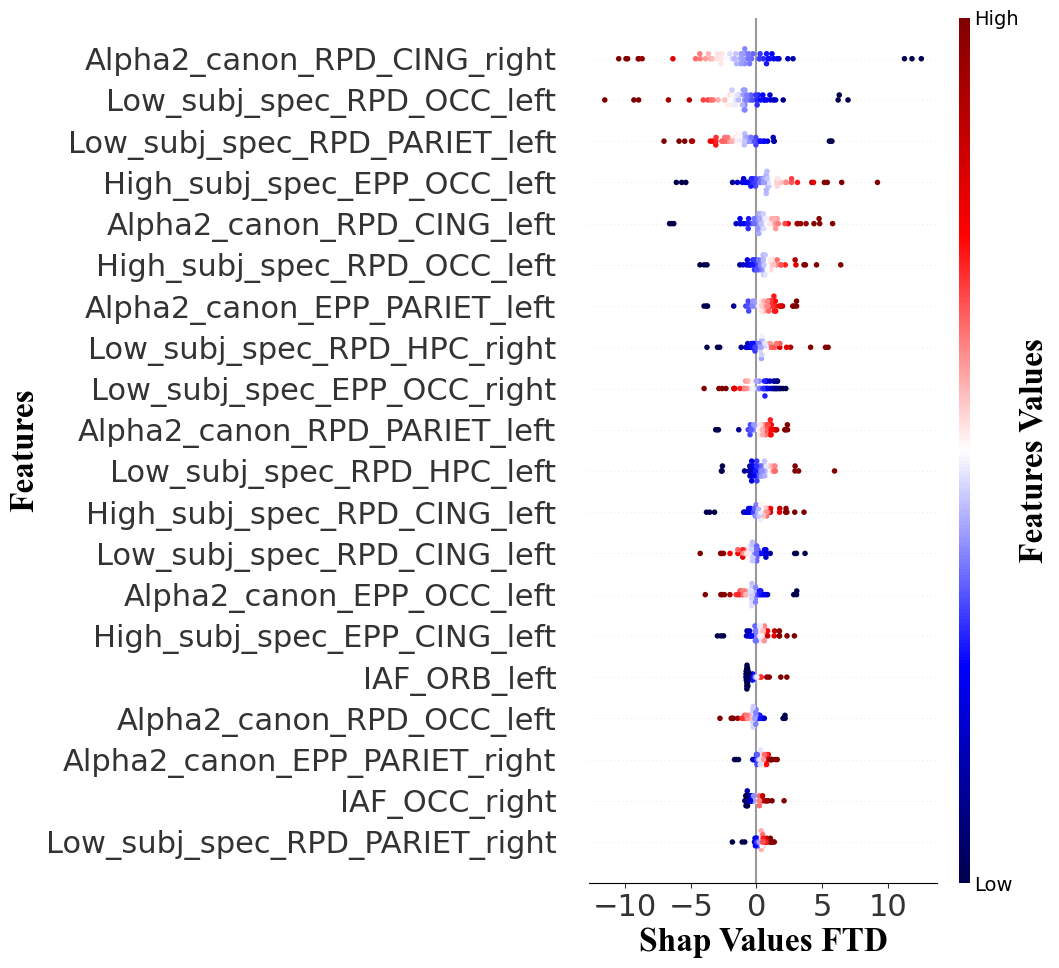

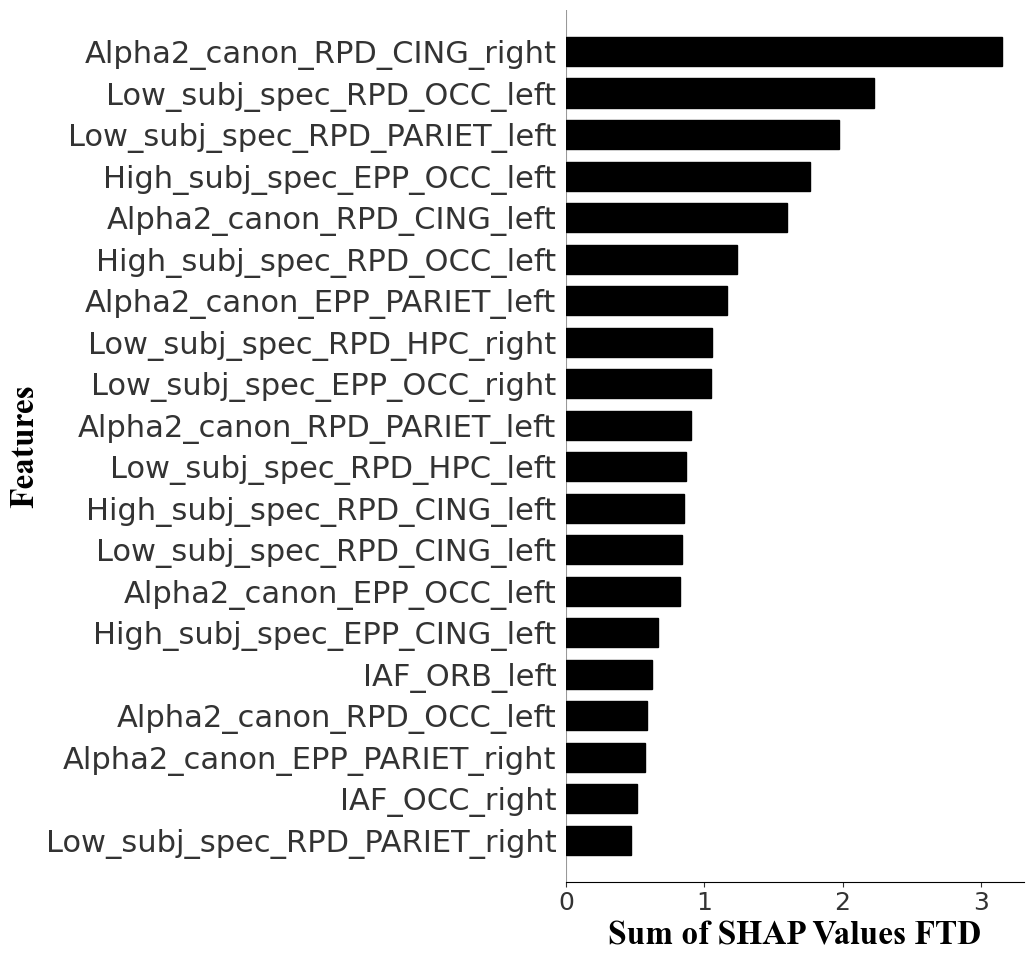

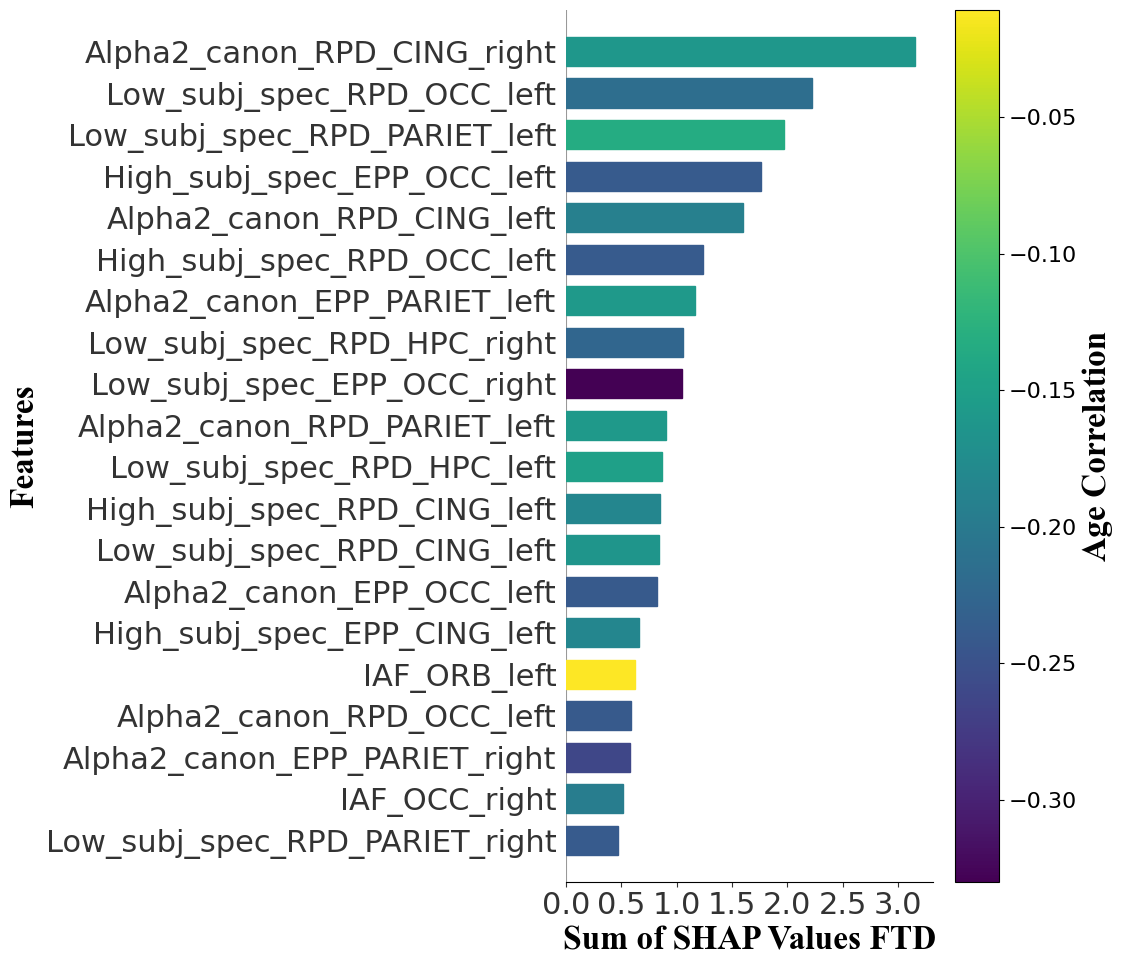

In [266]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_FTD,X_test=X_FTD,y_test=y_FTD, font= "Times New Roman", fontsize=24, xlabel1='Shap Values FTD', xlabel2='Sum of SHAP Values FTD',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [267]:
shap_per_region_sorted_FTD, normalized_result_sorted_FTD=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_FTD, num_max=20)

OCC_left: 1.000000
PARIET_left: 0.609498
CING_left: 0.595621
CING_right: 0.475664
OCC_right: 0.235084
HPC_right: 0.159304
PARIET_right: 0.157779
HPC_left: 0.130347
ORB_left: 0.094245


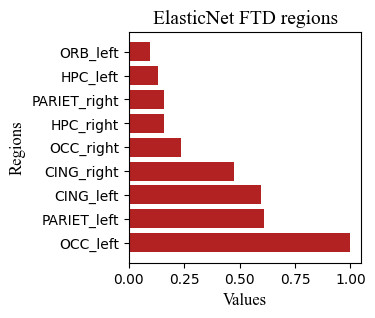

In [268]:
Plotters.plot_normalized_values(normalized_result_sorted_FTD, color='firebrick', name_set='ElasticNet FTD regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


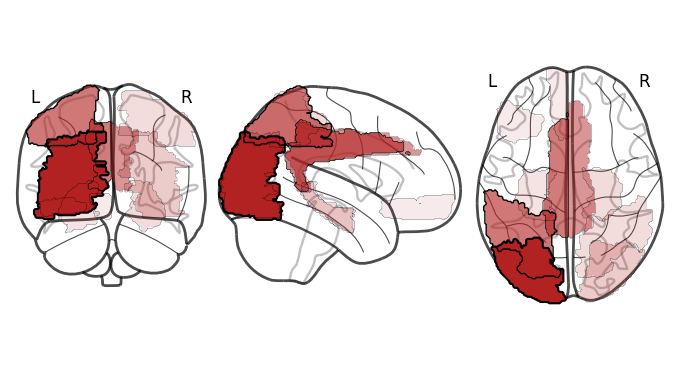

In [269]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_FTD, base_path, color='firebrick')

# SHAP MCI

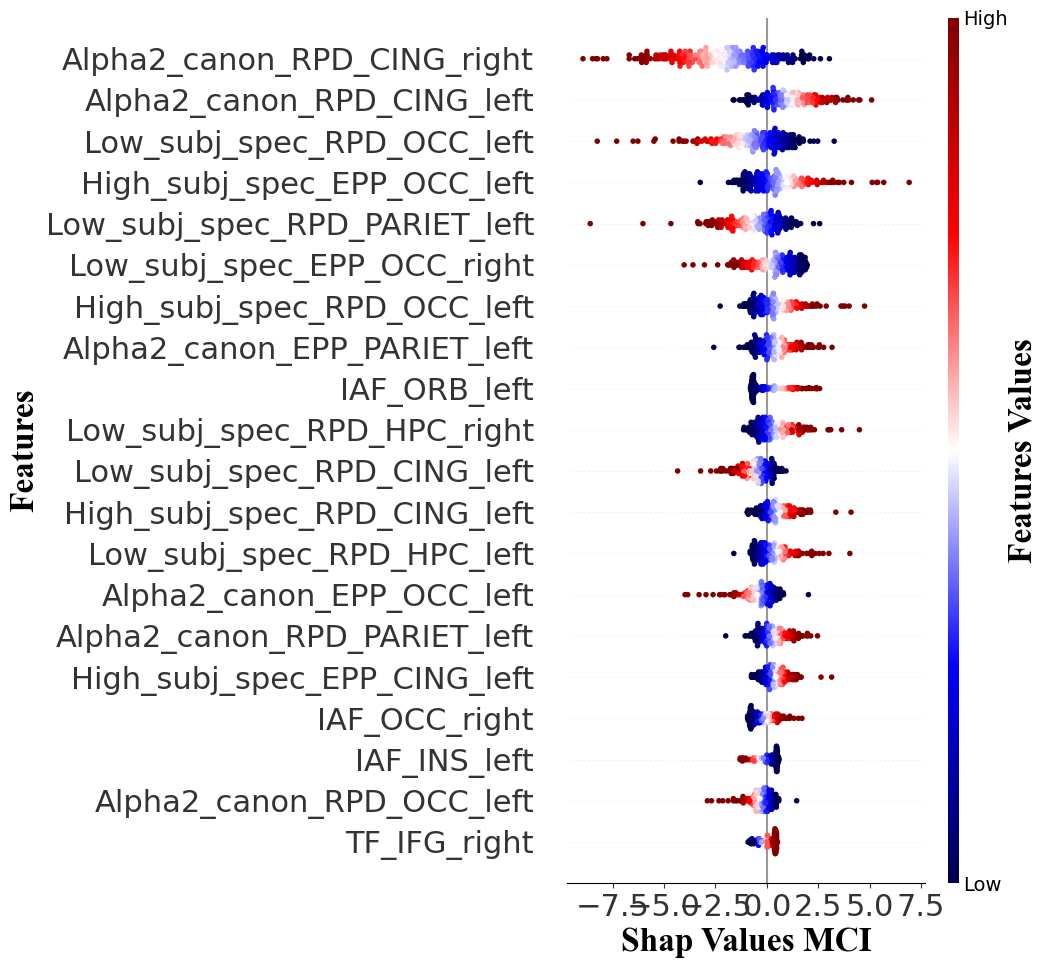

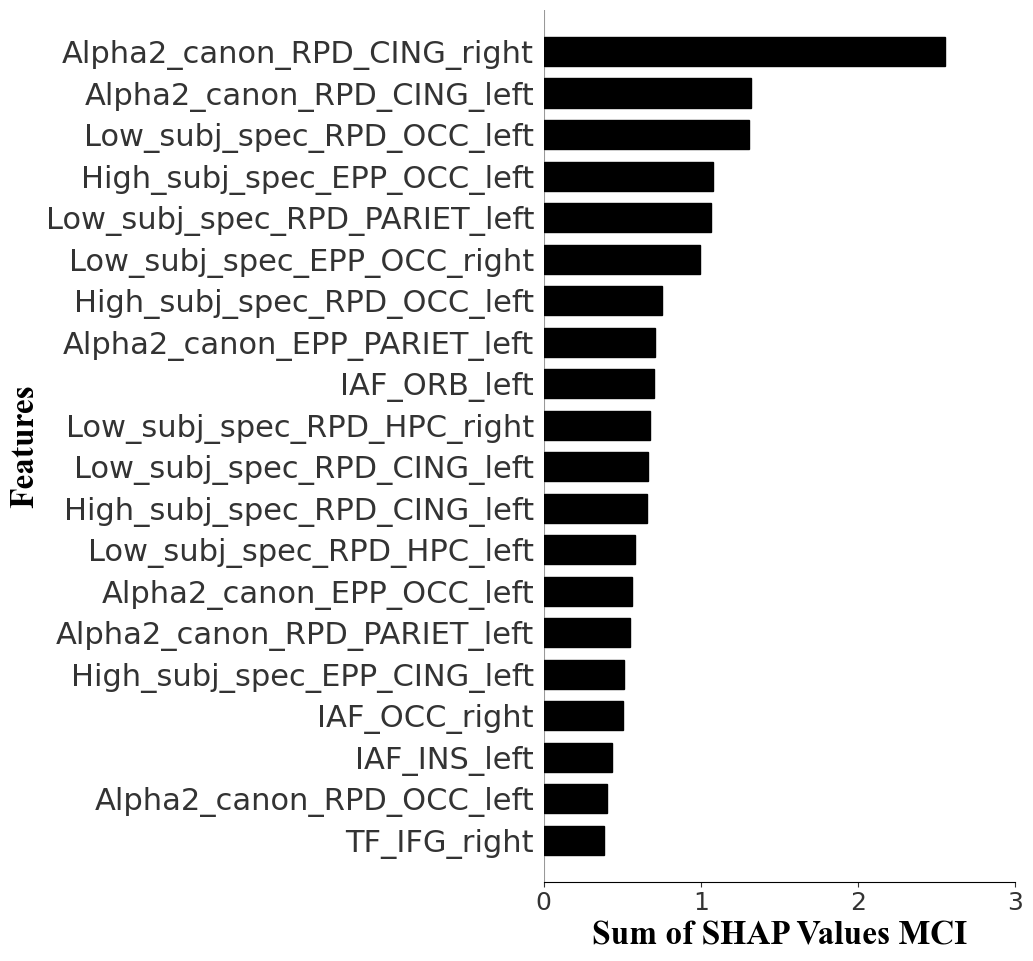

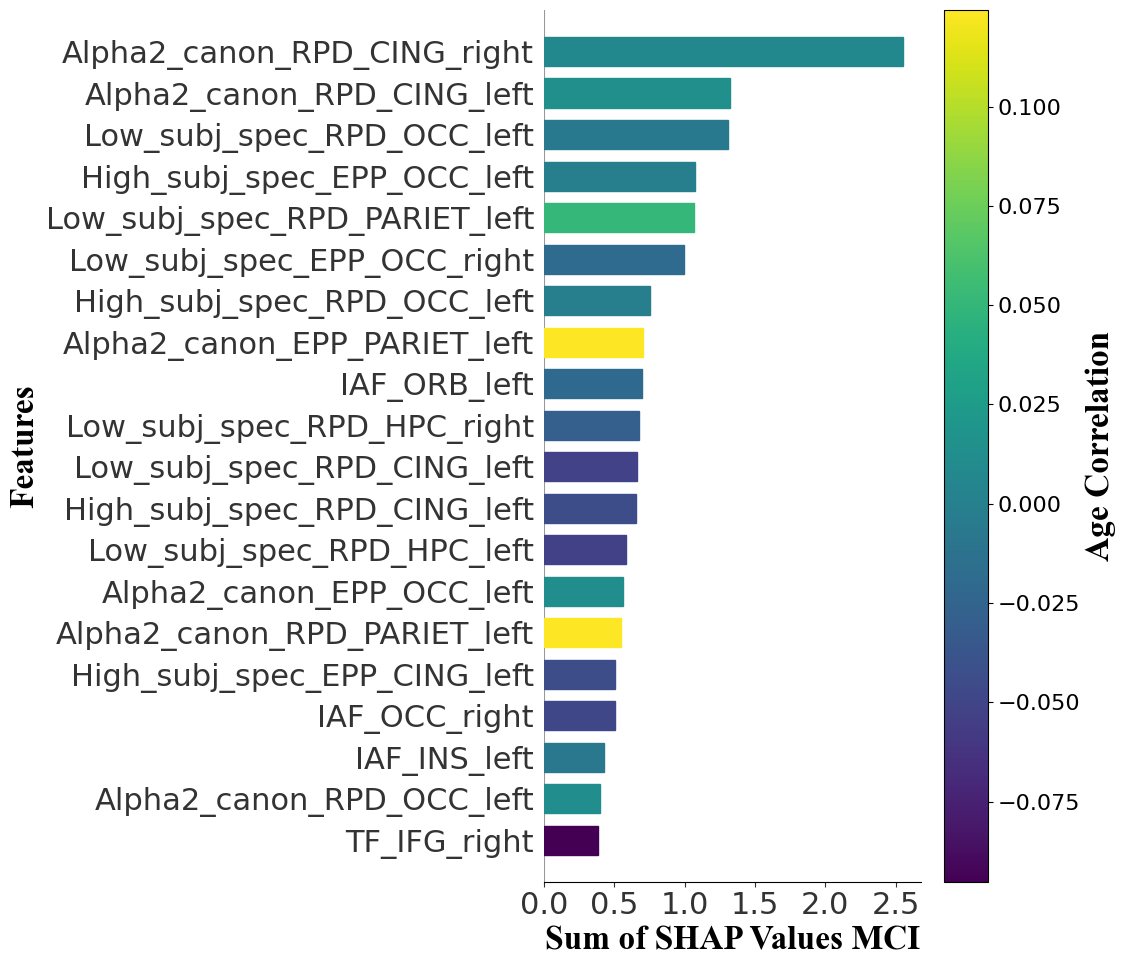

In [270]:
Plotters.plot_feature_importance(shap_values=shap_values_avg_MCI,X_test=X_MCI,y_test=y_MCI, font= "Times New Roman", fontsize=24, xlabel1='Shap Values MCI', xlabel2='Sum of SHAP Values MCI',ylabel='Features', ylabel1='Features Values', ylabel2='Age Correlation')

In [272]:
shap_per_region_sorted_MCI, normalized_result_sorted_MCI=model_reg.shap_region(shap_summary_sorted=shap_summary_sorted_MCI, num_max=20)

OCC_left: 1.000000
CING_left: 0.767784
CING_right: 0.622661
PARIET_left: 0.566843
OCC_right: 0.366055
ORB_left: 0.170908
HPC_right: 0.164236
HPC_left: 0.141694
INS_left: 0.105208
IFG_right: 0.093586


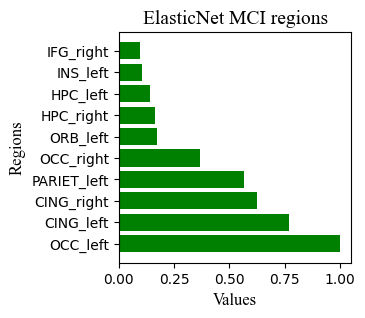

In [273]:
Plotters.plot_normalized_values(normalized_result_sorted_MCI, color='green', name_set='ElasticNet MCI regions',x_size=3,y_size=3,font='Times New Roman', fontsize=12, xlabel='Values', ylabel='Regions')

c:\python_env\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


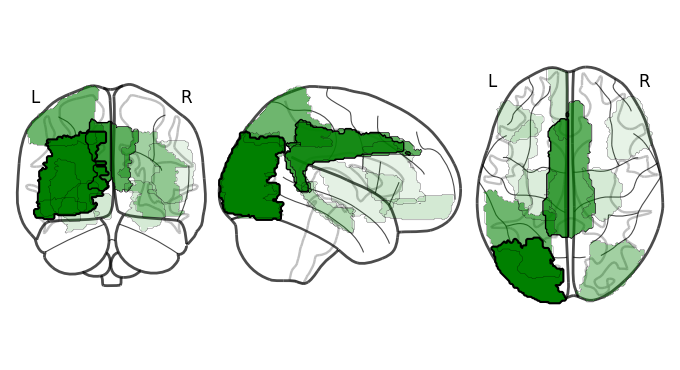

In [274]:
base_path = f'{path}cerebritos/'

Plotters.plot_brain_regions(normalized_result_sorted_MCI, base_path, color='green')

# Clasificacion

In [293]:
df_results_combined =df_CN_combined 


# Lista de columnas a limpiar
columns_to_clean = ['Educ', 'Sex', 'MMSE', 'GINI']

# Convertir las columnas a numérico, convirtiendo valores no numéricos a NaN
df_results_combined[columns_to_clean] = df_results_combined[columns_to_clean].apply(pd.to_numeric, errors='coerce')

# Eliminar filas donde cualquiera de las columnas especificadas es NaN
df_results_combined = df_results_combined.dropna(subset=columns_to_clean)

# Resetear el índice después de eliminar las filas
df_results_combined.reset_index(drop=True, inplace=True)

median_brain_age = df_results_combined['GAP_corrected'].median()
df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)



C:\Users\felip\AppData\Local\Temp\ipykernel_65516\4162156151.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_results_combined['brain_age_class'] = df_results_combined['GAP_corrected'].apply(lambda x: 1 if x > median_brain_age else 0)


In [294]:
df_results_combined

ID_unique  y_labels     y_pred  y_pred_corrected        GAP  \
0          209      69.0  71.946879         74.550289   2.946879   
1          210      73.0  63.248816         69.498453  -9.751184   
2          211      68.0  68.994671         70.661114   0.994671   
3          212      58.0  67.200356         59.779304   9.200356   
4          213      57.0  64.286259         55.911639   7.286259   
..         ...       ...        ...               ...        ...   
483       1378      74.0  65.447606         72.598655  -8.552394   
484       1379      57.0  64.910279         56.564493   7.910279   
485       1381      57.0  69.721091         61.352813  12.721091   
486       1382      69.0  69.681062         72.245598   0.681062   
487       1383      64.0  65.813569         63.816321   1.813569   

     GAP_corrected Country_unique   Region   Age  Sex  Educ  MMSE    HDI  \
0         5.550289      Argentina  America  69.0  2.0  15.0  29.0  0.851   
1        -3.501547      Argentina  America  73.0  2.0  15.0  30.0  0.851   
2         2.661114      Argentina  America  68.0  2.0  15.0  30.0  0.851   
3         1.779304      Argentina  America  58.0  1.0  15.0  28.0  0.851   
4        -1.088361      Argentina  America  57.0  2.0  14.0  27.0  0.851   
..             ...            ...      ...   ...  ...   ...   ...    ...   
483      -1.401345          Chile  America  74.0  2.0  12.0  30.0  0.855   
484      -0.435507          Chile  America  57.0  2.0  17.0  30.0  0.855   
485       4.352813          Chile  America  57.0  2.0  17.0  29.0  0.855   
486       3.245598          Chile  America  69.0  2.0  12.0  30.0  0.855   
487      -0.183679          Chile  America  64.0  2.0  22.0  30.0  0.855   

          GINI        ODQ  brain_age_class  
0    41.793333  99.483527                1  
1    41.793333  99.109256                0  
2    41.793333  99.577949                1  
3    41.793333  99.350428                1  
4    41.793333  98.395977                0  
..         ...        ...              ...  
483  44.920000  98.650235                0  
484  44.920000  99.599221                0  
485  44.920000  99.641446                1  
486  44.920000  98.420503                1  
487  44.920000        NaN                0  

[488 rows x 16 columns]

In [295]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold


X = df_results_combined[['Sex', 'Educ', 'MMSE', 'GINI']]
y = df_results_combined['brain_age_class']
id = df_results_combined['ID_unique']
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

df_concatenado = pd.concat([X, y, id], axis=1, ignore_index=False)


In [296]:
opt_model_cls, best_params_cls =model_cls.search_best_model(X=X_scaled, y=y, n_iter_=30, scoring_metric='accuracy',n_splits=5)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

In [297]:
best_params_cls = opt_model_cls.best_params_

In [298]:
best_params_cls

OrderedDict([('colsample_bytree', 0.9),
             ('eval_metric', 'aucpr'),
             ('learning_rate', 0.1),
             ('max_depth', 5),
             ('objective', 'binary:logistic'),
             ('reg_alpha', 0.1),
             ('reg_lambda', 1.0),
             ('subsample', 0.9)])

In [299]:
results_labels_df_train, results_labels_df_test,  results_model, results_per_fold_train, results_per_fold_test = model_cls.trainer(
        X=X,
        y=y,
        ID_label='ID_unique',
        ID=id,
        n_splits=5,
        n_iterations=20,
        params_=best_params_cls,
        scaler=3
    )

C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:195: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_train = pd.concat([results_labels_df_train, temp_df_train], ignore_index=True)
C:\Users/felip/OneDrive - Universidad Técnica Federico Santa María/Documentos/Brain/Brain_Age_Clock/Base_Models\base_classifier.py:197: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_labels_df_test = pd.concat([res

In [300]:
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, recall_score, precision_score, confusion_matrix

# Función para calcular métricas de clasificación
def clf_metrics(y_true, y_pred, y_prob):
    # Calcular métricas de clasificación
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    return {
        "AUC": auc(fpr, tpr),
        "FPR": fpr,
        "TPR": tpr,
        "Thresholds": thresholds,
        "F1 Score": f1_score(y_true, y_pred),
        "Accuracy": accuracy_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred),
    }

# Lista de métricas por fold
metrics_per_fold_cls = [
    clf_metrics(fold['y_labels'], fold['y_pred'], fold['y_prob'])
    for fold in results_per_fold_test
]

# Consolidar métricas por tipo
metrics_ = {key: [] for key in metrics_per_fold_cls[0].keys()}
for metrics in metrics_per_fold_cls:
    for key, value in metrics.items():
        metrics_[key].append(value)


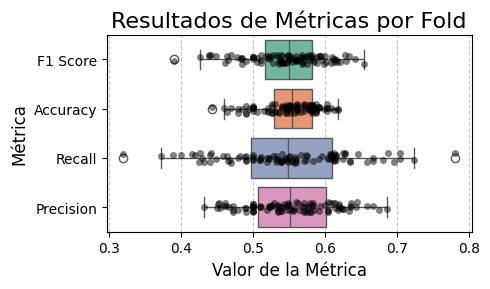

In [301]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Crear un DataFrame para las métricas de interés
metrics_df = pd.DataFrame({
    "F1 Score": metrics_["F1 Score"],
    "Accuracy": metrics_["Accuracy"],
    "Recall": metrics_["Recall"],
    "Precision": metrics_["Precision"]
})

# Configurar el gráfico
plt.figure(figsize=(5, 3))
sns.boxplot(data=metrics_df, orient="h", palette="Set2")
sns.stripplot(data=metrics_df, orient="h", color="black", alpha=0.5, jitter=True)

# Añadir detalles al gráfico
plt.title("Resultados de Métricas por Fold", fontsize=16)
plt.xlabel("Valor de la Métrica", fontsize=12)
plt.ylabel("Métrica", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


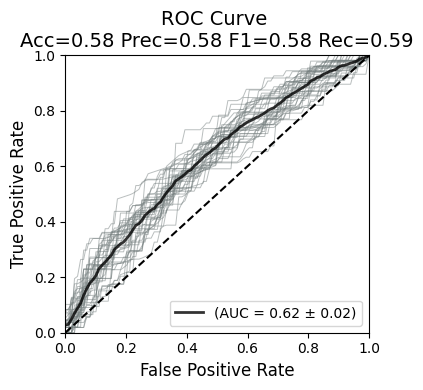

In [309]:
Plotters.graph_roc(metrics_, title="", individual=True, color_avg= 'black',treshold=0.60)


In [303]:
len(metrics_['AUC'])

100

In [310]:
def calculate_f_scores(metrics_, results_model, threshold=0.75):
    f_scores_all = []

    # Lista para almacenar todas las clases únicas
    all_classes = set()

    for i in range(len(metrics_['AUC'])):
        if metrics_["AUC"][i] < threshold:  # Ignorar modelos con AUC < threshold
            continue

        # Obtén los F-scores del modelo i
        f_scores = results_model['model'][i].get_booster().get_score()
        f_scores_all.append(list(f_scores.values()))

        # Agrega las clases de este modelo al conjunto de clases únicas
        all_classes.update(f_scores.keys())

    if not f_scores_all:  # Si no hay modelos que cumplan el umbral, retorna vacíos
        print("No se encontraron modelos con AUC por encima del umbral.")
        return [], [], []

    # Asegúrate de que todas las listas tengan la misma longitud
    max_length = max(len(lst) for lst in f_scores_all)
    f_scores_all_padded = [lst + [0] * (max_length - len(lst)) for lst in f_scores_all]

    # Calcula promedio y desviación estándar
    f_scores_array = np.array(f_scores_all_padded)
    f_scores_avg = np.mean(f_scores_array, axis=0)
    f_scores_std = np.std(f_scores_array, axis=0)

    # Convierte las clases únicas en una lista ordenada
    classes = sorted(all_classes)

    return list(f_scores_avg), list(f_scores_std), classes


In [311]:
f_scores, f_score_std, classes = calculate_f_scores(metrics_, results_model, threshold=0.65)
print("Promedio de F-scores:", f_scores)
print("Desviación estándar de F-scores:", f_score_std)
print("Características:", classes)

Promedio de F-scores: [156.0, 604.5, 331.0, 462.0]
Desviación estándar de F-scores: [14.0, 27.5, 5.0, 3.0]
Características: ['Educ', 'GINI', 'MMSE', 'Sex']


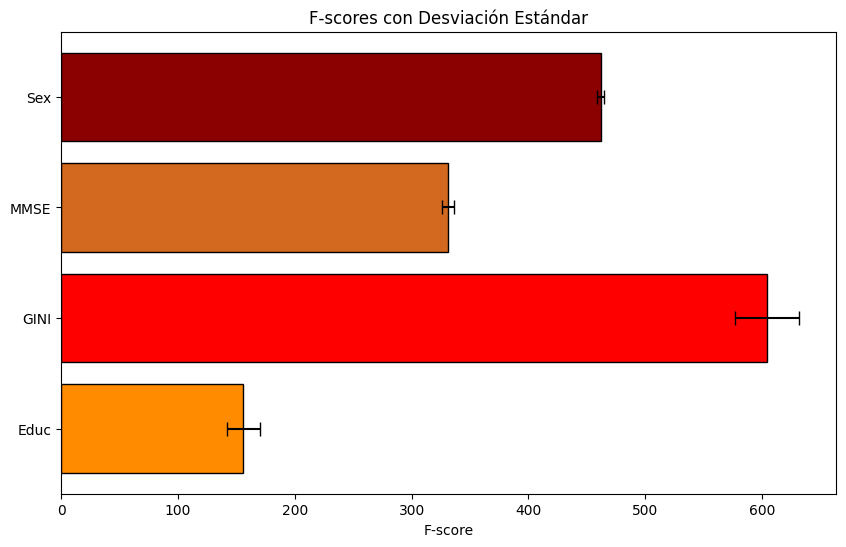

In [312]:
import matplotlib.pyplot as plt
import numpy as np

def plot_f_scores(f_scores, f_score_std, classes, colors=None):
    """
    Función para graficar F-scores con su desviación estándar en un gráfico de barras horizontales.
    
    Parámetros:
    - f_scores: lista de F-scores promedio.
    - f_score_std: lista de desviaciones estándar de los F-scores.
    - classes: lista de características.
    - colors: lista de colores para las barras. Si no se pasa, usa colores predeterminados.
    """
    
    if colors is None:
        # Si no se pasan colores, usar colores predeterminados (uno para cada barra)
        colors = ['lightblue'] * len(f_scores)
    
    # Configuración de la figura
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Crear las barras horizontales con error, asignando un color por cada barra
    bars = ax.barh(classes, f_scores, xerr=f_score_std, color=colors, edgecolor='black', capsize=5)
    
    # Etiquetas y título
    ax.set_xlabel('F-score')
    ax.set_title('F-scores con Desviación Estándar')
    
    # Mostrar el gráfico
    plt.show()


# Llamar a la función con colores personalizados (un color por barra)
plot_f_scores(f_scores, f_score_std, classes, colors=['darkorange', 'red', 'chocolate', 'darkred'])


In [313]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def C_Matrix(metrics_, title='', threshold=0.75, individual=True, avg=True, color_avg='#F24405', classes=[], colors=[]):
    temp_matrix = []

    # Recorre los 200 modelos
    for i in range(len(metrics_['AUC'])):
        if metrics_["AUC"][i] < threshold:  # Umbral para ignorar curvas con AUC < 0.75
            continue
        temp_matrix.append(metrics_["Confusion Matrix"][i])

    avg_conf_matrix = np.mean(np.array(temp_matrix), axis=0)
    classes_ = classes = ['Low', 'High']

    # Crear la figura
    plt.figure(figsize=(4, 3))
    sns.heatmap(avg_conf_matrix, annot=True, fmt='.2f', cmap='Greys', 
                cbar=True, linecolor='black', linewidths=1,
                xticklabels=classes_, yticklabels=classes,
                cbar_kws={'label': ''})
    
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()


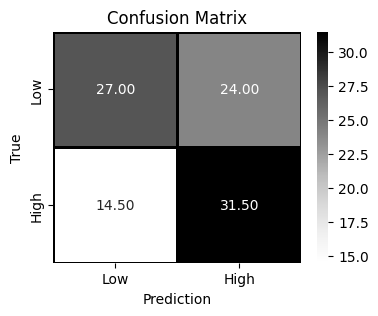

In [314]:
C_Matrix(metrics_, threshold=0.65)